## Import necessary libraries


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset


In [ ]:
# Load the dataset into a Pandas dataframe
students_df = pd.read_csv("../datasets/dataset.csv")

## Data Quality Check


In [ ]:
# set display width to a larger number
pd.set_option("display.width", 1000)

# Check the shape of the dataset
print("\nDataset shape:", students_df.shape)

# Check the data types of the variables
print("\nData types:")
print(students_df.dtypes)

# Check the first few rows of the dataset
print("\nFirst few rows:\n", students_df.head())

# Calculate the summary statistics for all columns
summary = students_df.describe().transpose().round(2)
summary = summary.rename(columns={"50%": "median", "std": "sd"})  # Change 50% to median

# Add columns for the number of missing values and the completeness rate
summary["n_missing"] = students_df.isnull().sum()
summary["complete_rate"] = 1 - (students_df.isnull().sum() / len(students_df))

# Print the summary statistics
print(
    "\nSummary statistics\n",
    summary[
        [
            "mean",
            "sd",
            "min",
            "25%",
            "median",
            "75%",
            "max",
            "n_missing",
            "complete_rate",
        ]
    ],
)

"""
# Check the missing values in the dataset
print("Missing values:\n", students_df.isnull().sum())
"""


Dataset shape: (4424, 35)

Data types:
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder              

'\n# Check the missing values in the dataset\nprint("Missing values:\n", students_df.isnull().sum())\n'

#### Get Duplicate Rows


In [5]:
# Display number of duplicated rows
print("Number of duplicated rows: ", students_df.duplicated().sum())

# Display rows with duplicates
# print(students_df[students_df.duplicated()])

Number of duplicated rows:  0


#### Get Unique Values


In [6]:
# Get no of Unique values in every column
for col in students_df.columns:
    if len(students_df[col].unique()) < 10:
        print(
            f"{col} has {len(students_df[col].unique())} unique values; Repeated values are {sorted(students_df[col].unique())}"
        )
    else:
        print(f"{col} has {len(students_df[col].unique())} values")

Marital status has 6 unique values; Repeated values are [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
Application mode has 18 values
Application order has 8 unique values; Repeated values are [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(9)]
Course has 17 values
Daytime/evening attendance has 2 unique values; Repeated values are [np.int64(0), np.int64(1)]
Previous qualification has 17 values
Nacionality has 21 values
Mother's qualification has 29 values
Father's qualification has 34 values
Mother's occupation has 32 values
Father's occupation has 46 values
Displaced has 2 unique values; Repeated values are [np.int64(0), np.int64(1)]
Educational special needs has 2 unique values; Repeated values are [np.int64(0), np.int64(1)]
Debtor has 2 unique values; Repeated values are [np.int64(0), np.int64(1)]
Tuition fees up to date has 2 unique values; Repeated values are [np.int64(0), np.int64(1)]
Gender has

#### Individual Variables Quality Check


In [7]:
# Defining categorical and quantitative columns based on the above checks and metadata description
categorical_cols = [
    "Marital status",
    "Application mode",
    "Application order",
    "Course",
    "Daytime/evening attendance",
    "Previous qualification",
    "Nacionality",
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Displaced",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Gender",
    "Scholarship holder",
    "International",
    "Target",
]

quantitative_cols = [
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 2nd sem (without evaluations)",
    "Age at enrollment",
    "Inflation rate",
    "GDP",
    "Unemployment rate",
]

##### Table Distribution and BoxPlots for Categorical Columns


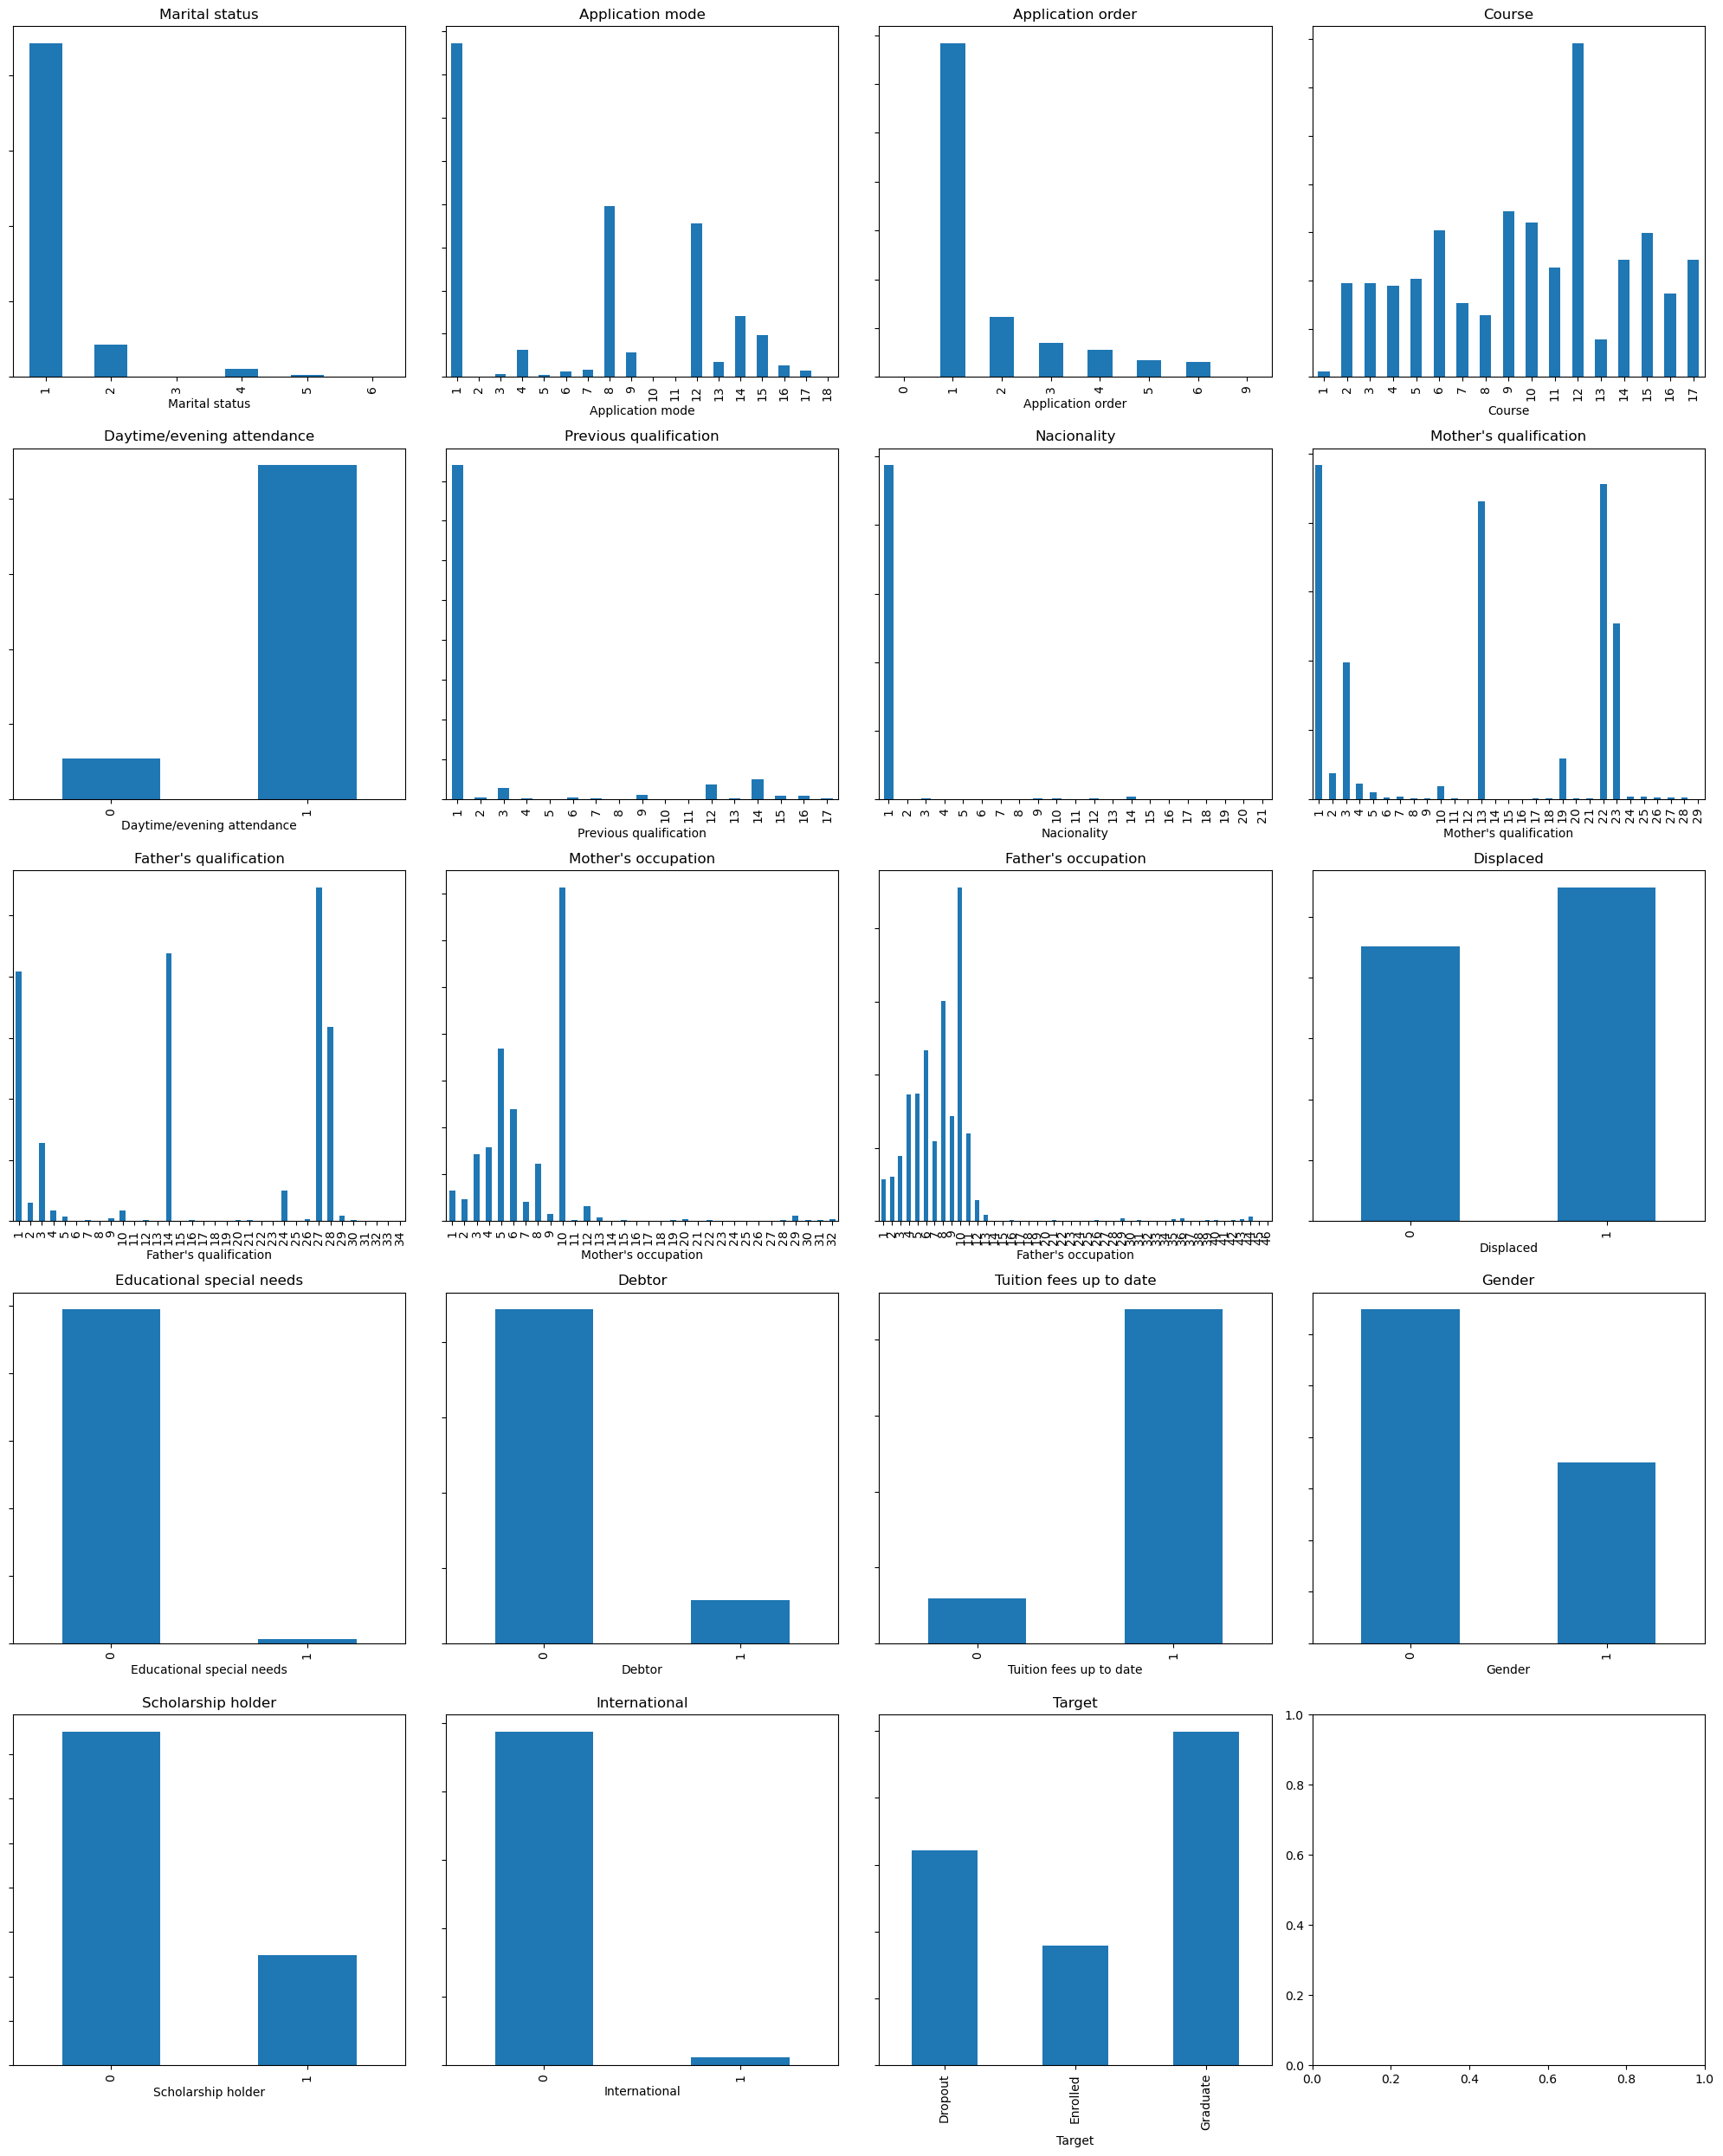

In [8]:
# loop through categorical columns and create barplot for each
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))
for i, col in enumerate(categorical_cols):
    row_idx = i // 4
    col_idx = i % 4
    vc = students_df[col].value_counts(normalize=True)
    vc = vc.sort_index()  # sort by category name
    vc.plot(kind="bar", ax=axes[row_idx, col_idx], rot=0)
    axes[row_idx, col_idx].set_title(col)
    for tick in axes[row_idx, col_idx].get_xticklabels():
        tick.set_rotation(90)
    for tick in axes[row_idx, col_idx].get_yticklabels():
        tick.set_visible(False)
fig.tight_layout()
plt.show()

In [9]:
# loop through categorical columns and create frequency table for each
for col in categorical_cols:
    freq_table = pd.DataFrame(students_df[col].value_counts())
    freq_table["Percent"] = freq_table[col] / len(students_df) * 100
    freq_table["Percent"] = freq_table["Percent"].map("{:.2f}%".format)
    freq_table = freq_table.reset_index().rename(
        columns={"index": col, col: "Frequency"}
    )
    print(freq_table.transpose().to_string(header=False), "\n")

KeyError: 'Marital status'

##### Numerical Summary and Histogram for Quantitative Variables


array([[<Axes: title={'center': 'Curricular units 1st sem (credited)'}>,
        <Axes: title={'center': 'Curricular units 1st sem (enrolled)'}>,
        <Axes: title={'center': 'Curricular units 1st sem (evaluations)'}>,
        <Axes: title={'center': 'Curricular units 1st sem (approved)'}>],
       [<Axes: title={'center': 'Curricular units 1st sem (grade)'}>,
        <Axes: title={'center': 'Curricular units 1st sem (without evaluations)'}>,
        <Axes: title={'center': 'Curricular units 2nd sem (credited)'}>,
        <Axes: title={'center': 'Curricular units 2nd sem (enrolled)'}>],
       [<Axes: title={'center': 'Curricular units 2nd sem (evaluations)'}>,
        <Axes: title={'center': 'Curricular units 2nd sem (approved)'}>,
        <Axes: title={'center': 'Curricular units 2nd sem (grade)'}>,
        <Axes: title={'center': 'Curricular units 2nd sem (without evaluations)'}>],
       [<Axes: title={'center': 'Age at enrollment'}>,
        <Axes: title={'center': 'Inflation r

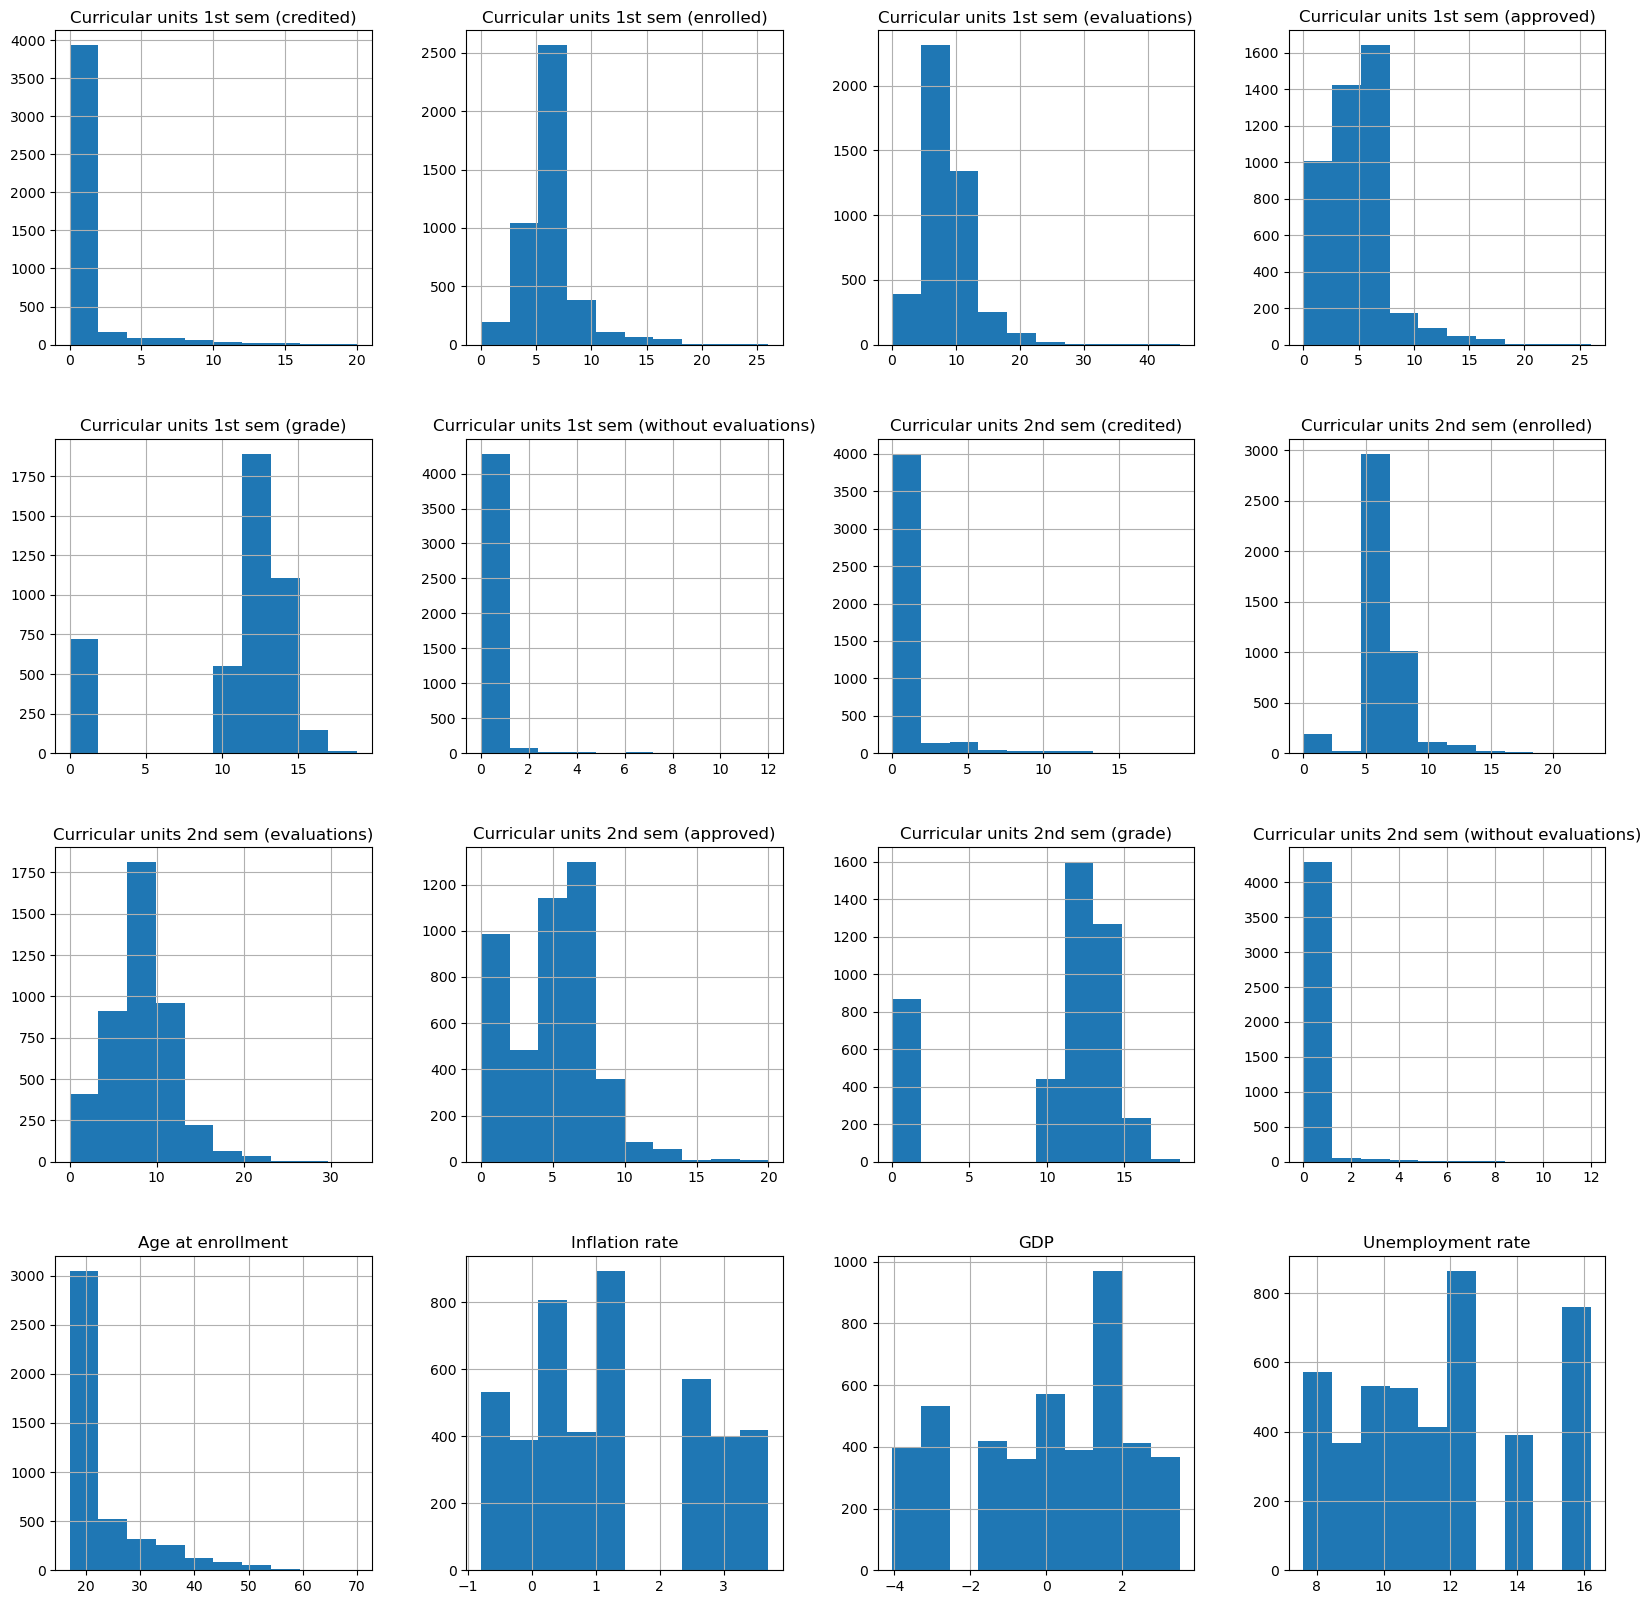

In [10]:
# Plot histograms for all quantitative columns
students_df[quantitative_cols].hist(figsize=(20, 20))

In [11]:
# Numerical Summaries for quantitative variables
summary_df = (
    students_df[quantitative_cols]
    .describe()
    .loc[["mean", "std", "min", "25%", "50%", "75%", "max"]]
)
summary_df.loc["skew"] = students_df[quantitative_cols].skew()

summary_df

Curricular units 1st sem (credited)  Curricular units 1st sem (enrolled)  Curricular units 1st sem (evaluations)  Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  Curricular units 1st sem (without evaluations)  Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  Curricular units 2nd sem (evaluations)  Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  Curricular units 2nd sem (without evaluations)  Age at enrollment  Inflation rate       GDP  Unemployment rate
mean                             0.709991                             6.270570                                8.299051                             4.706600                         10.640822                                        0.137658                             0.541817                             6.232143                                8.063291                             4.435805                         10.230206                                        0.150316          23.265145        1.228029  0.001969          11.566139
std                              2.360507                             2.480178                                4.179106                             3.094238                          4.843663                                        0.690880                             1.918546                             2.195951                                3.947951                             3.014764                          5.210808                                        0.753774           7.587816        1.382711  2.269935           2.663850
min                              0.000000                             0.000000                                0.000000                             0.000000                          0.000000                                        0.000000                             0.000000                             0.000000                                0.000000                             0.000000                          0.000000                                        0.000000          17.000000       -0.800000 -4.060000           7.600000
25%                              0.000000                             5.000000                                6.000000                             3.000000                         11.000000                                        0.000000                             0.000000                             5.000000                                6.000000                             2.000000                         10.750000                                        0.000000          19.000000        0.300000 -1.700000           9.400000
50%                              0.000000                             6.000000                                8.000000                             5.000000                         12.285714                                        0.000000                             0.000000                             6.000000                                8.000000                             5.000000                         12.200000                                        0.000000          20.000000        1.400000  0.320000          11.100000
75%                              0.000000                             7.000000                               10.000000                             6.000000                         13.400000                                        0.000000                             0.000000                             7.000000                               10.000000                             6.000000                         13.333333                                        0.000000          25.000000        2.600000  1.790000          13.900000
max                             20.000000                            26.000000                               45.000000                            26.000000                         18.875000                                       12.000000                        

In [12]:
# Show numerical summaries for columns of interest i.e. Inflation rate and GDP
cols_of_interest = ["Inflation rate", "GDP"]
summary_df2 = (
    students_df[cols_of_interest]
    .describe()
    .loc[["mean", "std", "min", "25%", "50%", "75%", "max"]]
)
summary_df2.loc["skew"] = students_df[cols_of_interest].skew()
print(summary_df2)

      Inflation rate       GDP
mean        1.228029  0.001969
std         1.382711  2.269935
min        -0.800000 -4.060000
25%         0.300000 -1.700000
50%         1.400000  0.320000
75%         2.600000  1.790000
max         3.700000  3.510000
skew        0.252375 -0.394068


In [13]:
# Show skew values for higher skew variables
print("Variables with higher skew values:")
for col in quantitative_cols:
    if abs(summary_df.loc["skew", col]) > 1:
        print(f"\t{col}: {summary_df.loc['skew', col]}")

Variables with higher skew values:
	Curricular units 1st sem (credited): 4.169048768133995
	Curricular units 1st sem (enrolled): 1.6190409058476551
	Curricular units 1st sem (grade): -1.568145594413272
	Curricular units 1st sem (without evaluations): 8.207403102428648
	Curricular units 2nd sem (credited): 4.634819505432633
	Curricular units 2nd sem (grade): -1.3136501682968427
	Curricular units 2nd sem (without evaluations): 7.267700851141788
	Age at enrollment: 2.0549883694238757


## Data Cleaning


After testing a variety of data cleaning steps, we found that the category merging step was the most effective. This step improved the accuracy and precision of our ML models compared to the other steps. We observed that models using dataset cleaned via the outlier removal step resulted in similar accuracy to those done via the category merging step, but with lower precision and accuracy scores. The normalization step did not result in any significant improvements in model accuracy or precision, and made exploratory data analysis (EDA) less meaningful as the variables were scaled.
Therefore, we have decided to only use the category merging step in our data cleaning process.


In [14]:
# Duplicate the data
students_df_cleaned = students_df.copy()

#### Correct Application Order having value 0


In [ ]:
# import library to calculate mode
from scipy.stats import mode

# replace 0 values with NaN
students_df_cleaned["Application order"] = students_df_cleaned[
    "Application order"
].replace(0, np.nan)

# calculate mode of Application order column
mode_result = mode(students_df_cleaned["Application order"].dropna(), keepdims=True)
mode_value = mode_result.mode[0]

# impute missing values with mode
students_df_cleaned["Application order"] = students_df_cleaned[
    "Application order"
].fillna(mode_value)

#### Combine categories with low frequency


In [17]:
# Define the minimum frequency for combining categories
min_freq = 150

# Combine categories with low frequency
combined_cats_dict = {}
for col in categorical_cols:
    # Check if the variable is not binary
    if len(students_df_cleaned[col].unique()) > 2:
        # Count the frequency of each category
        counts = students_df_cleaned[col].value_counts()
        # Identify the categories with low frequency
        low_freq_cats = counts[counts < min_freq].index.tolist()
        # Only combine categories if at least 2 categories have frequency less than min_freq
        if len(low_freq_cats) >= 2:
            # Combine the low frequency categories into a single "Other" category represented as -1
            students_df_cleaned[col] = students_df_cleaned[col].apply(
                lambda x: -1 if x in low_freq_cats else x
            )
            # Identify the categories that were combined
            combined_cats_dict[col] = ", ".join(str(cat) for cat in low_freq_cats)
            other_percent = (
                len(students_df_cleaned[students_df_cleaned[col] == -1])
                / len(students_df)
                * 100
            )
            # print(f"Categories combined for {col}: {combined_cats_dict[col]} \t totalling: {other_percent:.2f}%")
            print(
                f"For {col} variable, -1 (Other) constitutes {other_percent:.2f}% & combines categories {combined_cats_dict[col]}"
            )

print("\n")

# loop through categorical columns and create frequency table for each
for col in categorical_cols:
    freq_table = pd.DataFrame(students_df_cleaned[col].value_counts())
    freq_table["Percent"] = freq_table[col] / len(students_df) * 100
    freq_table["Percent"] = freq_table["Percent"].map("{:.2f}%".format)
    freq_table = freq_table.reset_index().rename(
        columns={"index": col, col: "Frequency"}
    )
    print(freq_table.transpose().to_string(header=False), "\n")

For Marital status variable, -1 (Other) constitutes 2.85% & combines categories 4, 5, 6, 3
For Application mode variable, -1 (Other) constitutes 12.07% & combines categories 4, 9, 13, 16, 7, 17, 6, 3, 5, 2, 18, 10, 11
For Application order variable, -1 (Other) constitutes 3.12% & combines categories 6.0, 9.0
For Course variable, -1 (Other) constitutes 5.40% & combines categories 8, 13, 1
For Previous qualification variable, -1 (Other) constitutes 7.37% & combines categories 3, 9, 15, 16, 2, 6, 7, 4, 13, 17, 8, 11, 5, 10
For Nacionality variable, -1 (Other) constitutes 2.49% & combines categories 14, 12, 3, 9, 10, 16, 4, 18, 15, 8, 17, 11, 2, 19, 13, 5, 21, 20, 6, 7
For Mother's qualification variable, -1 (Other) constitutes 8.88% & combines categories 19, 2, 4, 10, 5, 25, 7, 24, 26, 27, 6, 28, 18, 20, 21, 9, 17, 8, 11, 12, 14, 16, 15, 29
For Father's qualification variable, -1 (Other) constitutes 8.11% & combines categories 24, 2, 4, 10, 29, 5, 9, 26, 7, 30, 12, 21, 16, 20, 18, 33, 31,

KeyError: 'Marital status'

#### Change Column Name for "Nacionality"


In [18]:
# Change Column Name in dataset
students_df_cleaned = students_df_cleaned.rename(columns={"Nacionality": "Nationality"})

# Update the column name in the categorical_cols list
categorical_cols[categorical_cols.index("Nacionality")] = "Nationality"

#### Normalize quantitative columns having high skewness


In [19]:
# Identify columns with high skewness
high_skew_cols = summary_df.columns[
    (summary_df.loc["skew"] > 1) | (summary_df.loc["skew"] < -1)
]

# Duplicate the dataset
students_df_normalised = students_df_cleaned.copy()

# Normalize data using log transformation
students_df_normalised[high_skew_cols] = np.sqrt(students_df_normalised[high_skew_cols])

# Alternatively, we can also use other normalization techniques
# students_df_cleaned[high_skew_cols] = np.log(students_df_cleaned[high_skew_cols])

# Numerical Summaries for quantitative variables
summary_df_normalised = (
    students_df_normalised[quantitative_cols]
    .describe()
    .loc[["mean", "std", "min", "25%", "50%", "75%", "max"]]
)
summary_df_normalised.loc["skew"] = students_df_normalised[quantitative_cols].skew()

# Stack the two dataframes vertically with a separator
separator = pd.DataFrame([["----"] * len(quantitative_cols)], columns=quantitative_cols)
stacked_summary = pd.concat(
    [summary_df, separator, summary_df_normalised],
    keys=["Original Summary", "----", "Normalised Summary"],
)

stacked_summary

Curricular units 1st sem (credited) Curricular units 1st sem (enrolled) Curricular units 1st sem (evaluations) Curricular units 1st sem (approved) Curricular units 1st sem (grade) Curricular units 1st sem (without evaluations) Curricular units 2nd sem (credited) Curricular units 2nd sem (enrolled) Curricular units 2nd sem (evaluations) Curricular units 2nd sem (approved) Curricular units 2nd sem (grade) Curricular units 2nd sem (without evaluations) Age at enrollment Inflation rate       GDP Unemployment rate
Original Summary   mean                            0.709991                             6.27057                               8.299051                              4.7066                        10.640822                                       0.137658                            0.541817                            6.232143                               8.063291                            4.435805                        10.230206                                       0.150316         23.265145       1.228029  0.001969         11.566139
                   std                             2.360507                            2.480178                               4.179106                            3.094238                         4.843663                                        0.69088                            1.918546                            2.195951                               3.947951                            3.014764                         5.210808                                       0.753774          7.587816       1.382711  2.269935           2.66385
                   min                                  0.0                                 0.0                                    0.0                                 0.0                              0.0                                            0.0                                 0.0                                 0.0                                    0.0                                 0.0                              0.0                                            0.0              17.0           -0.8     -4.06               7.6
                   25%                                  0.0                                 5.0                                    6.0                                 3.0                             11.0                                            0.0                                 0.0                                 5.0                                    6.0                                 2.0                            10.75                                            0.0              19.0            0.3      -1.7               9.4
                   50%                                  0.0                                 6.0                                    8.0                                 5.0                        12.285714                                            0.0                                 0.0                                 6.0                                    8.0                                 5.0                             12.2                                            0.0              20.0            1.4      0.32              11.1
                   75%                                  0.0                                 7.0                                   10.0                                 6.0                             13.4                                            0.0                                 0.0                                 7.0                                   10.0                                 6.0                        13.333333                                            0.0              25.0            2.6      1.79              13.9
                   max                                 20.0                                26.0                                   45.0                                26.0                           18.875                                           12.0 

#### Removing the outliers


In [20]:
# Make a copy of the original normalized dataset
students_df_normalised_no_outliers = students_df_normalised.copy()

# Calculate the IQR for each numerical column
Q1 = students_df_normalised[quantitative_cols].quantile(0.25)
Q3 = students_df_normalised[quantitative_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
outliers = (
    (students_df_normalised[quantitative_cols] < lower_bound)
    | (students_df_normalised[quantitative_cols] > upper_bound)
).any(axis=1)
students_df_normalised_no_outliers = students_df_normalised[~outliers]

## Exploratory Data Analysis


#### Analysing correlation within same class of attributes


To analyze the relationship between different features, we will create correlation matrices for different data categories.

But first, we need to convert 'Target' to numerical


C:\Users\IAMRO-PC\AppData\Local\Temp\ipykernel_8696\3208649727.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  students_df_cleaned["Target"].replace("Dropout", 0, inplace=True)
C:\Users\IAMRO-PC\AppData\Local\Temp\ipykernel_8696\3208649727.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

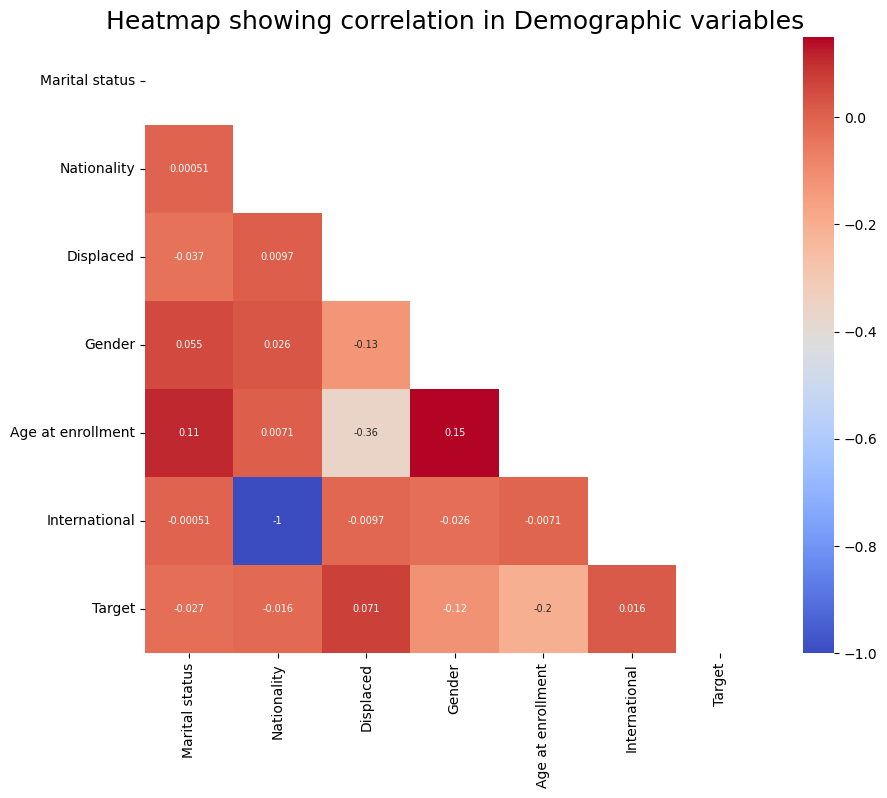

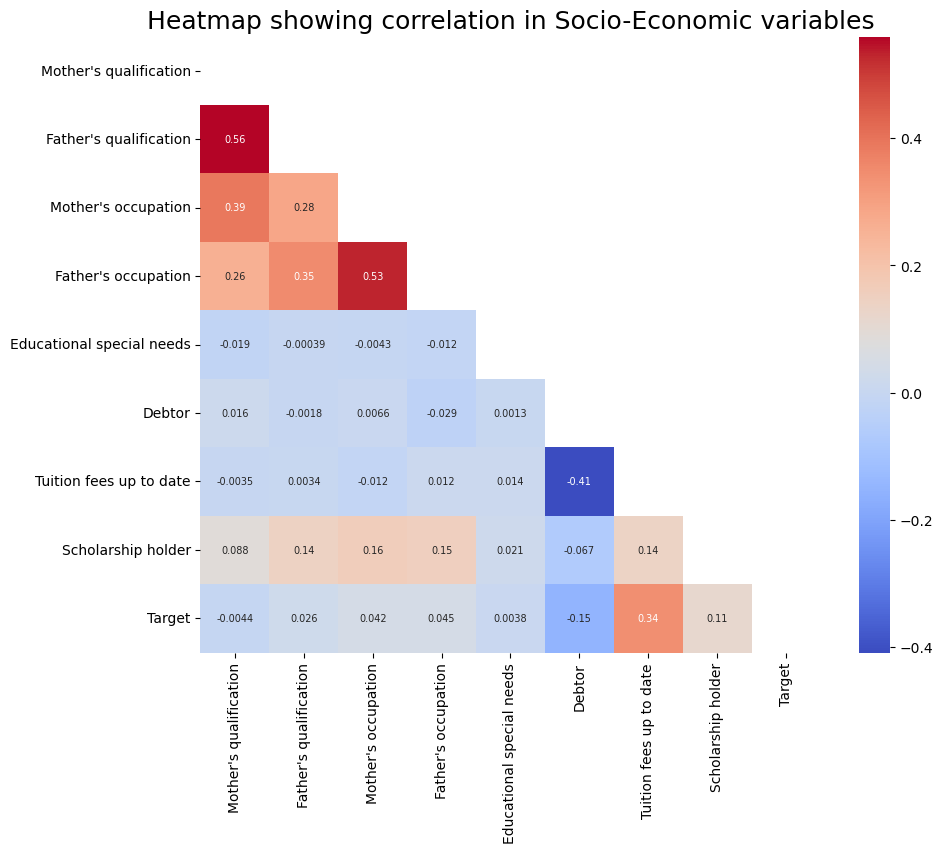

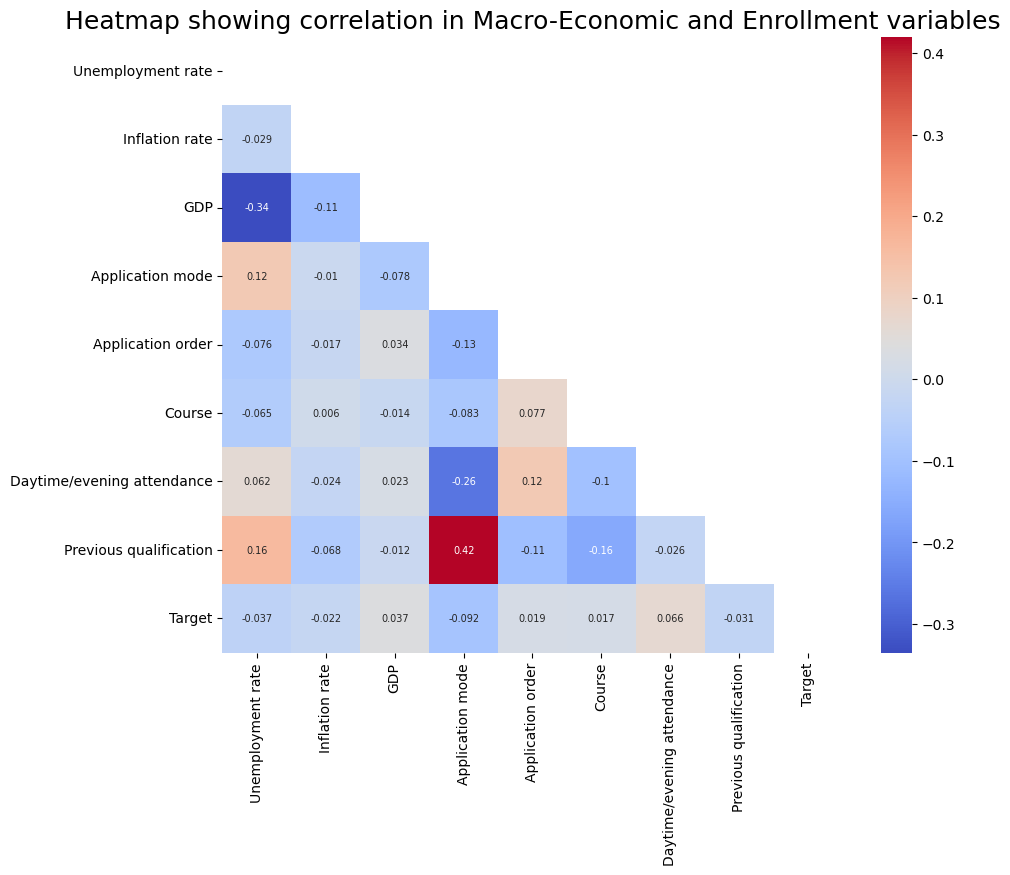

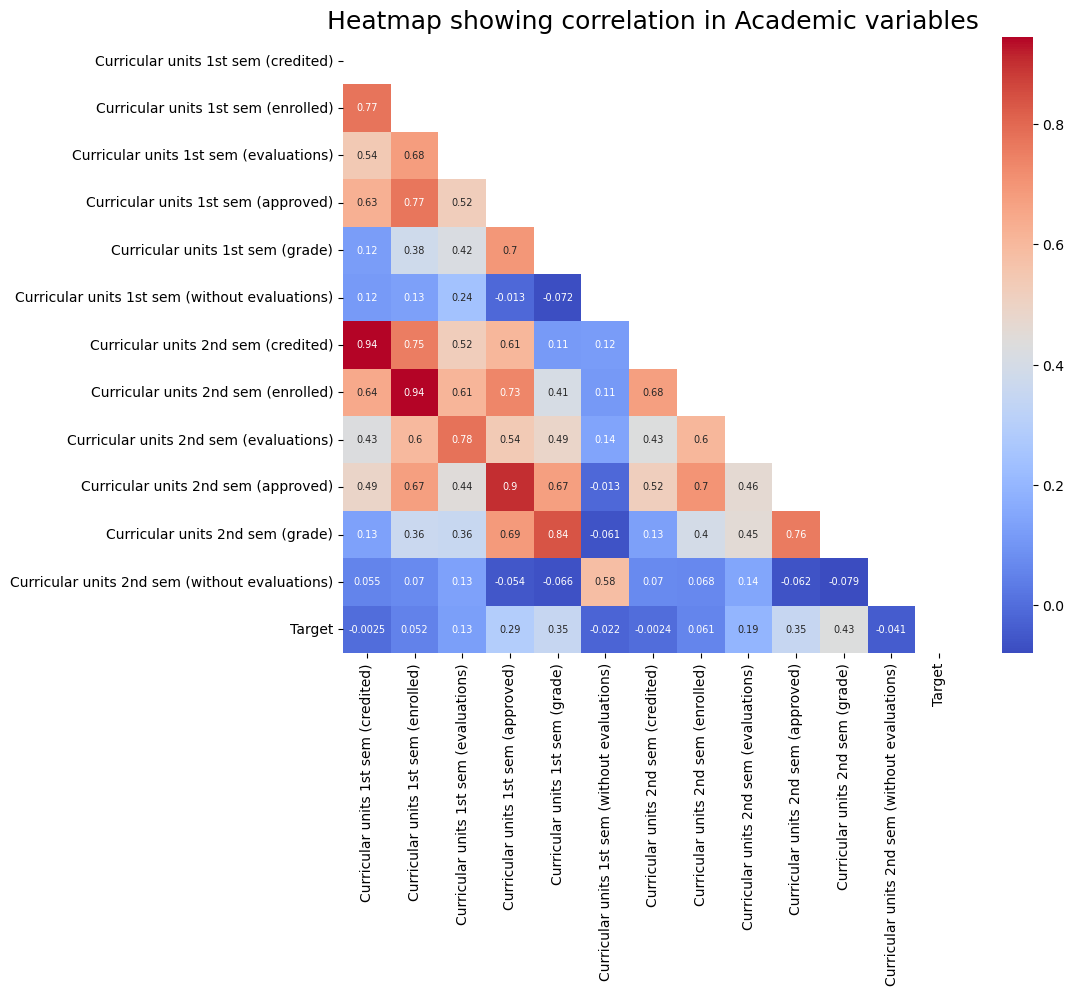

In [21]:
def corr_plot(df, title, threshold=0.5):
    # Compute the correlation matrix on cleaned dataset
    corr_matrix = df.corr()

    # Create a mask to display only the upper triangle of the heatmap
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Create a heatmap with the high correlation variables annotated
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        corr_matrix[(corr_matrix > threshold) | (corr_matrix < -threshold)],
        cmap="coolwarm",
        annot=True,
        annot_kws={"size": 7},
        mask=mask,
    )
    title = "Heatmap showing correlation in " + title + " variables"
    plt.title(title, fontsize=18)
    plt.show()

    return corr_matrix


# Convert Target to numerical
students_df_cleaned["Target"].replace("Dropout", 0, inplace=True)
students_df_cleaned["Target"].replace("Graduate", 1, inplace=True)
students_df_cleaned["Target"].replace("Enrolled", 2, inplace=True)


# Demographic Features
demographic_df = students_df_cleaned[
    [
        "Marital status",
        "Nationality",
        "Displaced",
        "Gender",
        "Age at enrollment",
        "International",
        "Target",
    ]
]

# Socio Economic Features
socioeconomic_df = students_df_cleaned[
    [
        "Mother's qualification",
        "Father's qualification",
        "Mother's occupation",
        "Father's occupation",
        "Educational special needs",
        "Debtor",
        "Tuition fees up to date",
        "Scholarship holder",
        "Target",
    ]
]

# Macro and Enrollment Features
macroenrollment_df = students_df_cleaned[
    [
        "Unemployment rate",
        "Inflation rate",
        "GDP",
        "Application mode",
        "Application order",
        "Course",
        "Daytime/evening attendance",
        "Previous qualification",
        "Target",
    ]
]

# Academic Features
academic_df = students_df_cleaned[
    [
        "Curricular units 1st sem (credited)",
        "Curricular units 1st sem (enrolled)",
        "Curricular units 1st sem (evaluations)",
        "Curricular units 1st sem (approved)",
        "Curricular units 1st sem (grade)",
        "Curricular units 1st sem (without evaluations)",
        "Curricular units 2nd sem (credited)",
        "Curricular units 2nd sem (enrolled)",
        "Curricular units 2nd sem (evaluations)",
        "Curricular units 2nd sem (approved)",
        "Curricular units 2nd sem (grade)",
        "Curricular units 2nd sem (without evaluations)",
        "Target",
    ]
]

# Combining results into one
corr_df = []

# Plot the correlation heatmaps for each group with correlation threshold 0
corr_df.append(corr_plot(demographic_df, "Demographic", 0))
corr_df.append(corr_plot(socioeconomic_df, "Socio-Economic", 0))
corr_df.append(corr_plot(macroenrollment_df, "Macro-Economic and Enrollment", 0))
corr_df.append(corr_plot(academic_df, "Academic", 0))

Removing correlated features from analysis


In [22]:
# Define features to remove
features_to_remove = [
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (approved)",
    "Nationality",
]

# remove the specified columns from the dataframe
students_df_cleaned = students_df_cleaned.drop(features_to_remove, axis=1)

# remove columns from categorical columns
categorical_cols = [col for col in categorical_cols if col not in features_to_remove]

# remove columns from quantitative columns
quantitative_cols = [col for col in quantitative_cols if col not in features_to_remove]

#### Check the correlation between remaining quantitative variables


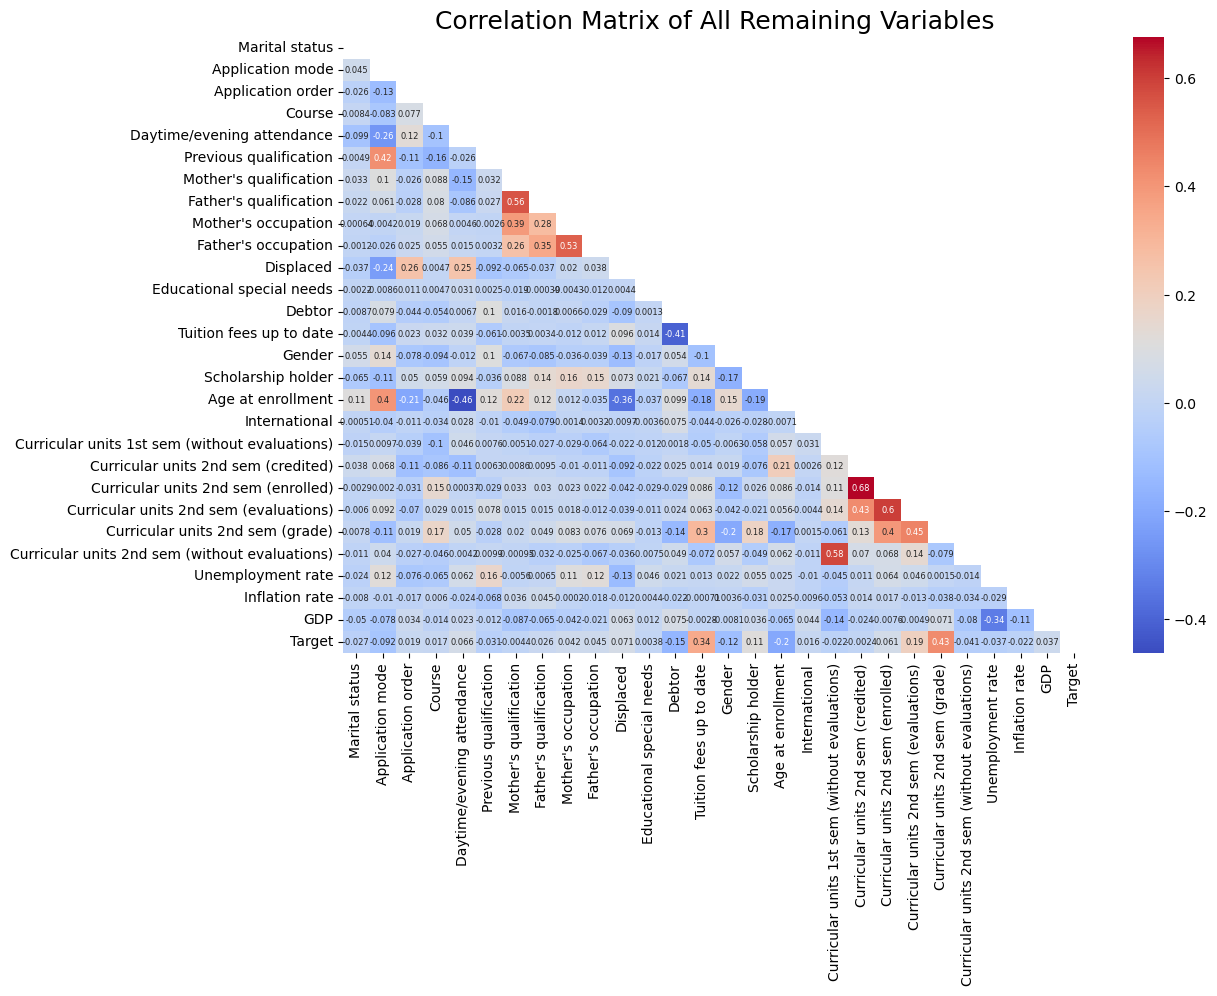

In [23]:
"""
# Create a copy of the original dataset
students_df_encoded = students_df_cleaned.copy()

# Convert the Target variable to numerical representation
students_df_encoded['Target'] = students_df_encoded['Target'].astype('category').cat.codes

# Compute the correlation matrix
corr_matrix = students_df_encoded.corr()
"""

# Compute the correlation matrix on cleaned dataset
corr_matrix = students_df_cleaned.corr()

# Set the threshold for high correlation
threshold = 0

# Create a mask to display only the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a heatmap with the high correlation variables annotated
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix[(corr_matrix > threshold) | (corr_matrix < -threshold)],
    cmap="coolwarm",
    annot=True,
    annot_kws={"size": 6},
    mask=mask,
)

# Add lines connecting the highly correlated variables
"""
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            plt.axhline(y=i+0.5, color='grey', linestyle='dotted', alpha=0.1)
            plt.axvline(x=j+0.5, color='grey', linestyle='dotted', alpha=0.1)
"""

plt.title("Correlation Matrix of All Remaining Variables", fontsize=18)
plt.show()

In [24]:
# Store high correlations in a list of tuples and sort it by absolute value of the correlation coefficient
high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr.append(
                (
                    corr_matrix.columns[i],
                    corr_matrix.columns[j],
                    abs(corr_matrix.iloc[i, j]),
                )
            )
high_corr.sort(key=lambda x: x[2], reverse=True)

# Print top 10 high correlations in sorted order
for c1, c2, corr in high_corr[:10]:
    print(f"{c1} - {c2}: {round(corr,2)}")

Curricular units 2nd sem (enrolled) - Curricular units 2nd sem (credited): 0.68
Curricular units 2nd sem (evaluations) - Curricular units 2nd sem (enrolled): 0.6
Curricular units 2nd sem (without evaluations) - Curricular units 1st sem (without evaluations): 0.58
Father's qualification - Mother's qualification: 0.56
Father's occupation - Mother's occupation: 0.53
Age at enrollment - Daytime/evening attendance: 0.46
Curricular units 2nd sem (grade) - Curricular units 2nd sem (evaluations): 0.45
Curricular units 2nd sem (evaluations) - Curricular units 2nd sem (credited): 0.43
Target - Curricular units 2nd sem (grade): 0.43
Previous qualification - Application mode: 0.42


### For Q1, the response variable is 'Target', so we need to analyse the independent variables with Target


Since we're aiming to predict the academic success of the students, Target of 'enrolled' holds no significance, and can be dropped.


#### Distribution of Target variable


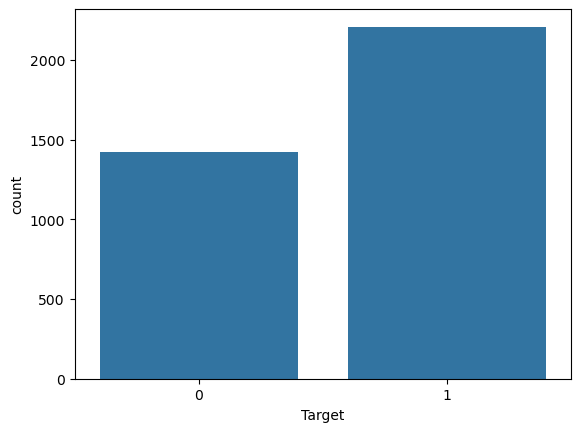

In [25]:
# Removing enrolled from the Target variable
students_df_cleaned = students_df_cleaned[students_df_cleaned.Target != 2]

# Check the distribution of the "Target" variable
sns.countplot(x="Target", data=students_df_cleaned)
plt.show()

In [26]:
# Frequency table for Target
print("Target distribution")
target_counts = students_df_cleaned["Target"].value_counts()
print("0\tDropout \t", target_counts[0])
print("1\tGraduate\t", target_counts[1])

Target distribution
0	Dropout 	 1421
1	Graduate	 2209


#### Distribution of 'Target' with other Categorical Variables


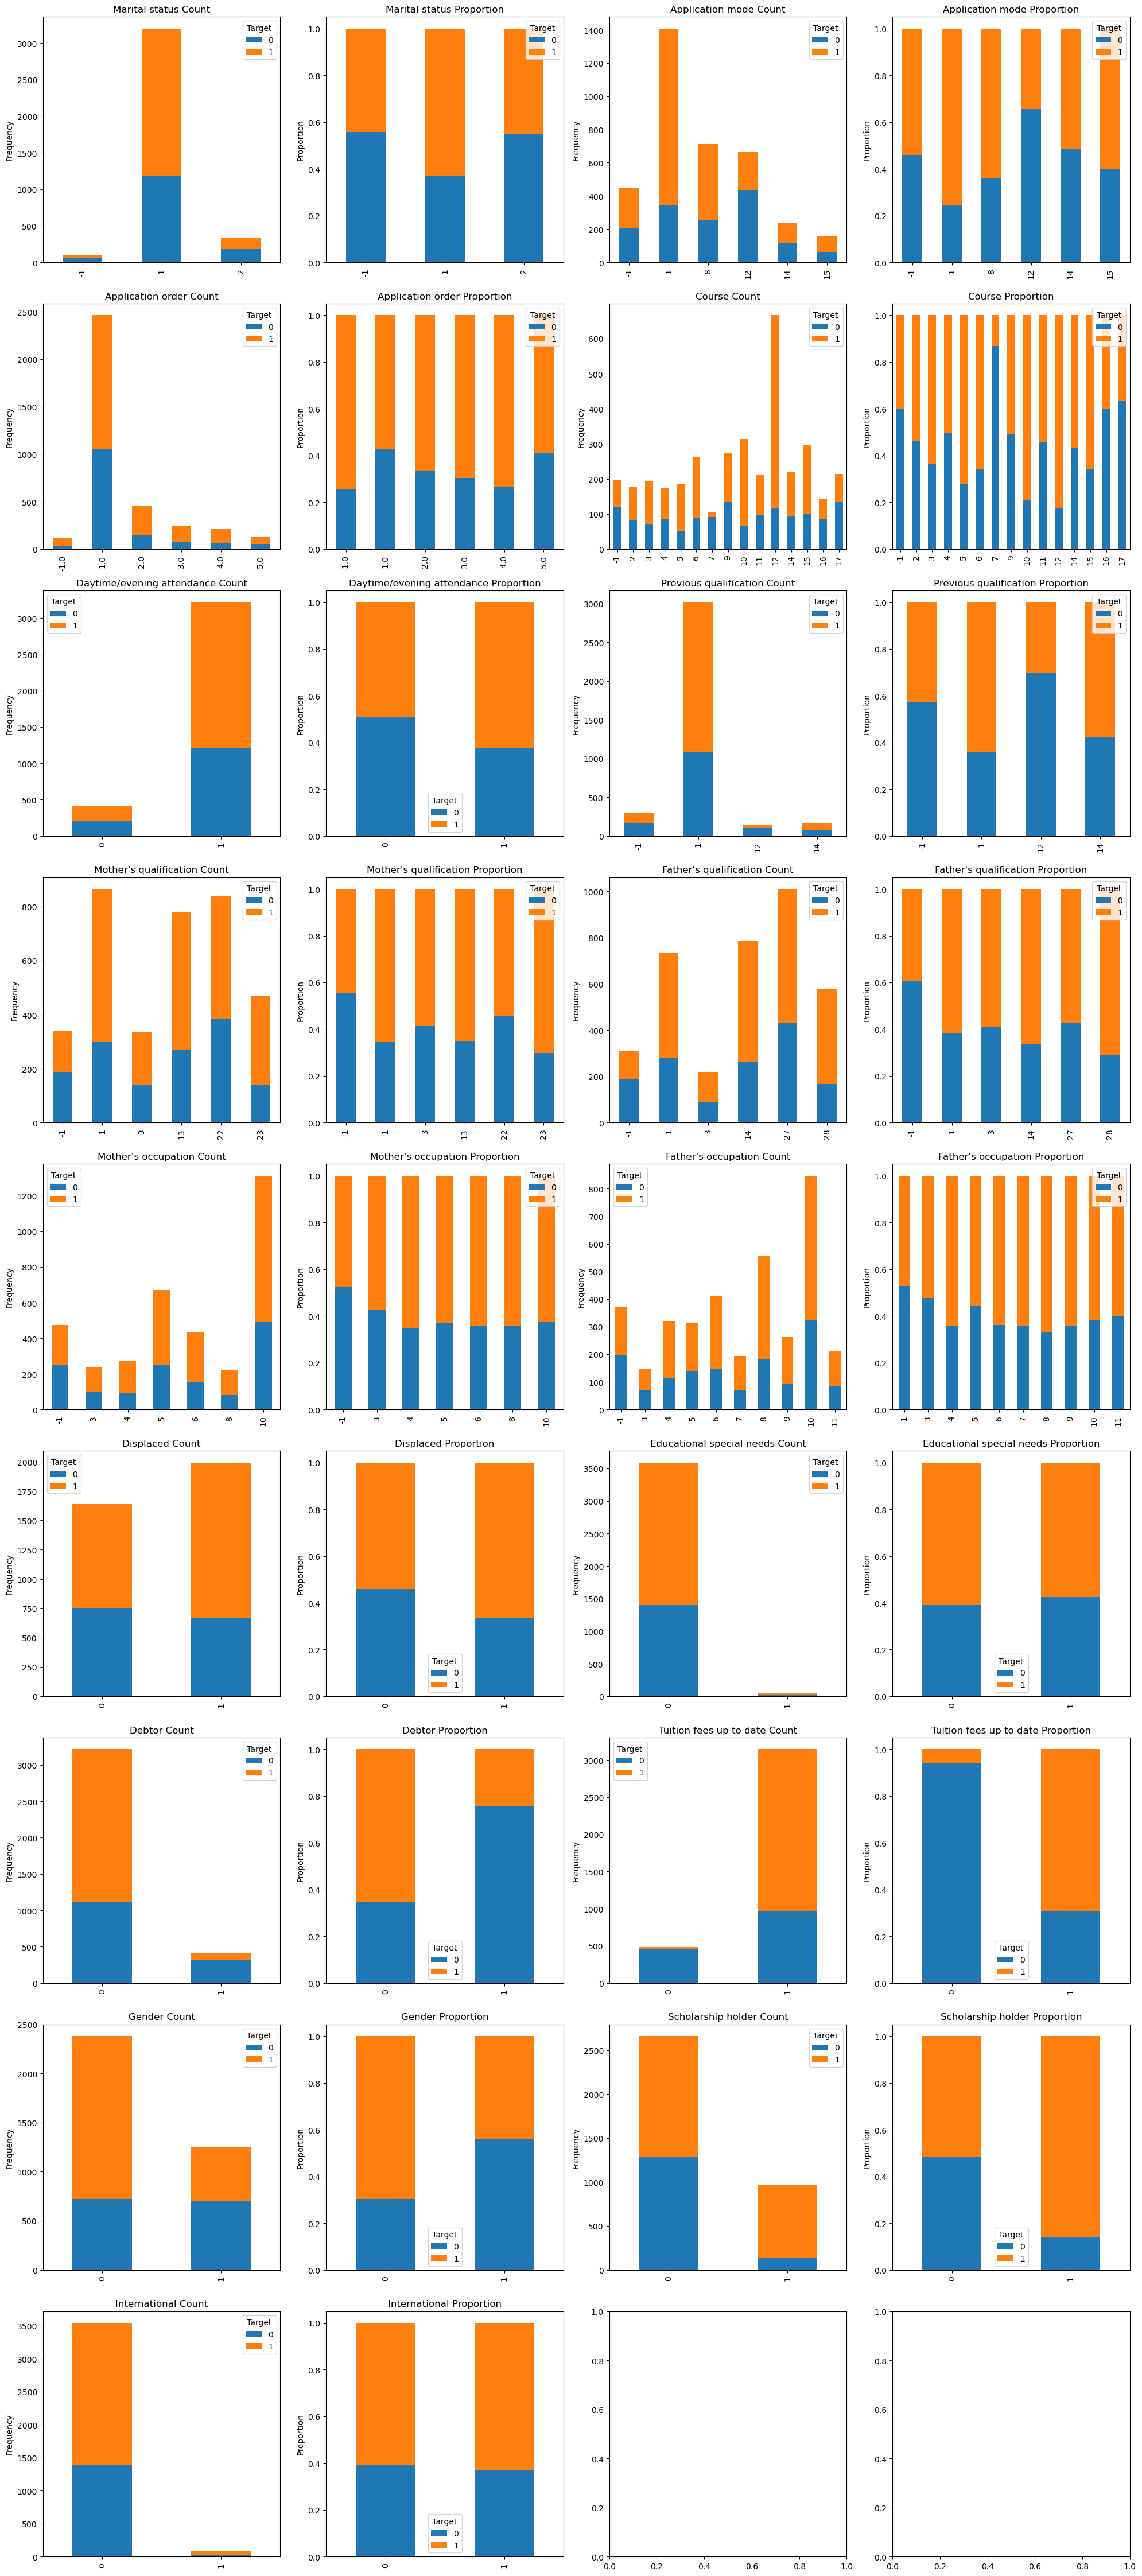

In [27]:
# Create a 9x4 grid of subplots for the bar charts
fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(20, 45))

# Select all categorical columns except Target
selected_cols = [col for col in categorical_cols if col != "Target"]

# Loop through the selected columns and create a bar chart for each one
for i in range(len(selected_cols)):
    row1 = i // 2
    col1 = (i % 2) * 2
    col2 = col1 + 1
    counts = (
        students_df_cleaned.groupby([selected_cols[i], "Target"])["Course"]
        .count()
        .unstack()
    )
    counts_norm = counts.apply(lambda x: x / x.sum(), axis=1)
    counts.plot(kind="bar", stacked=True, ax=axes[row1][col1])
    axes[row1][col1].set_title(selected_cols[i] + " Count", fontsize=12)
    axes[row1][col1].set_xlabel("")
    axes[row1][col1].set_ylabel("Frequency")
    axes[row1][col1].legend(title="Target")

    counts_norm.plot(kind="bar", stacked=True, ax=axes[row1][col2])
    axes[row1][col2].set_title(selected_cols[i] + " Proportion", fontsize=12)
    axes[row1][col2].set_xlabel("")
    axes[row1][col2].set_ylabel("Proportion")
    axes[row1][col2].legend(title="Target")


# Adjust the spacing between subplots and display the figure
plt.tight_layout()
plt.show()

Below bar charts show the proportion of highly imbalanced variables


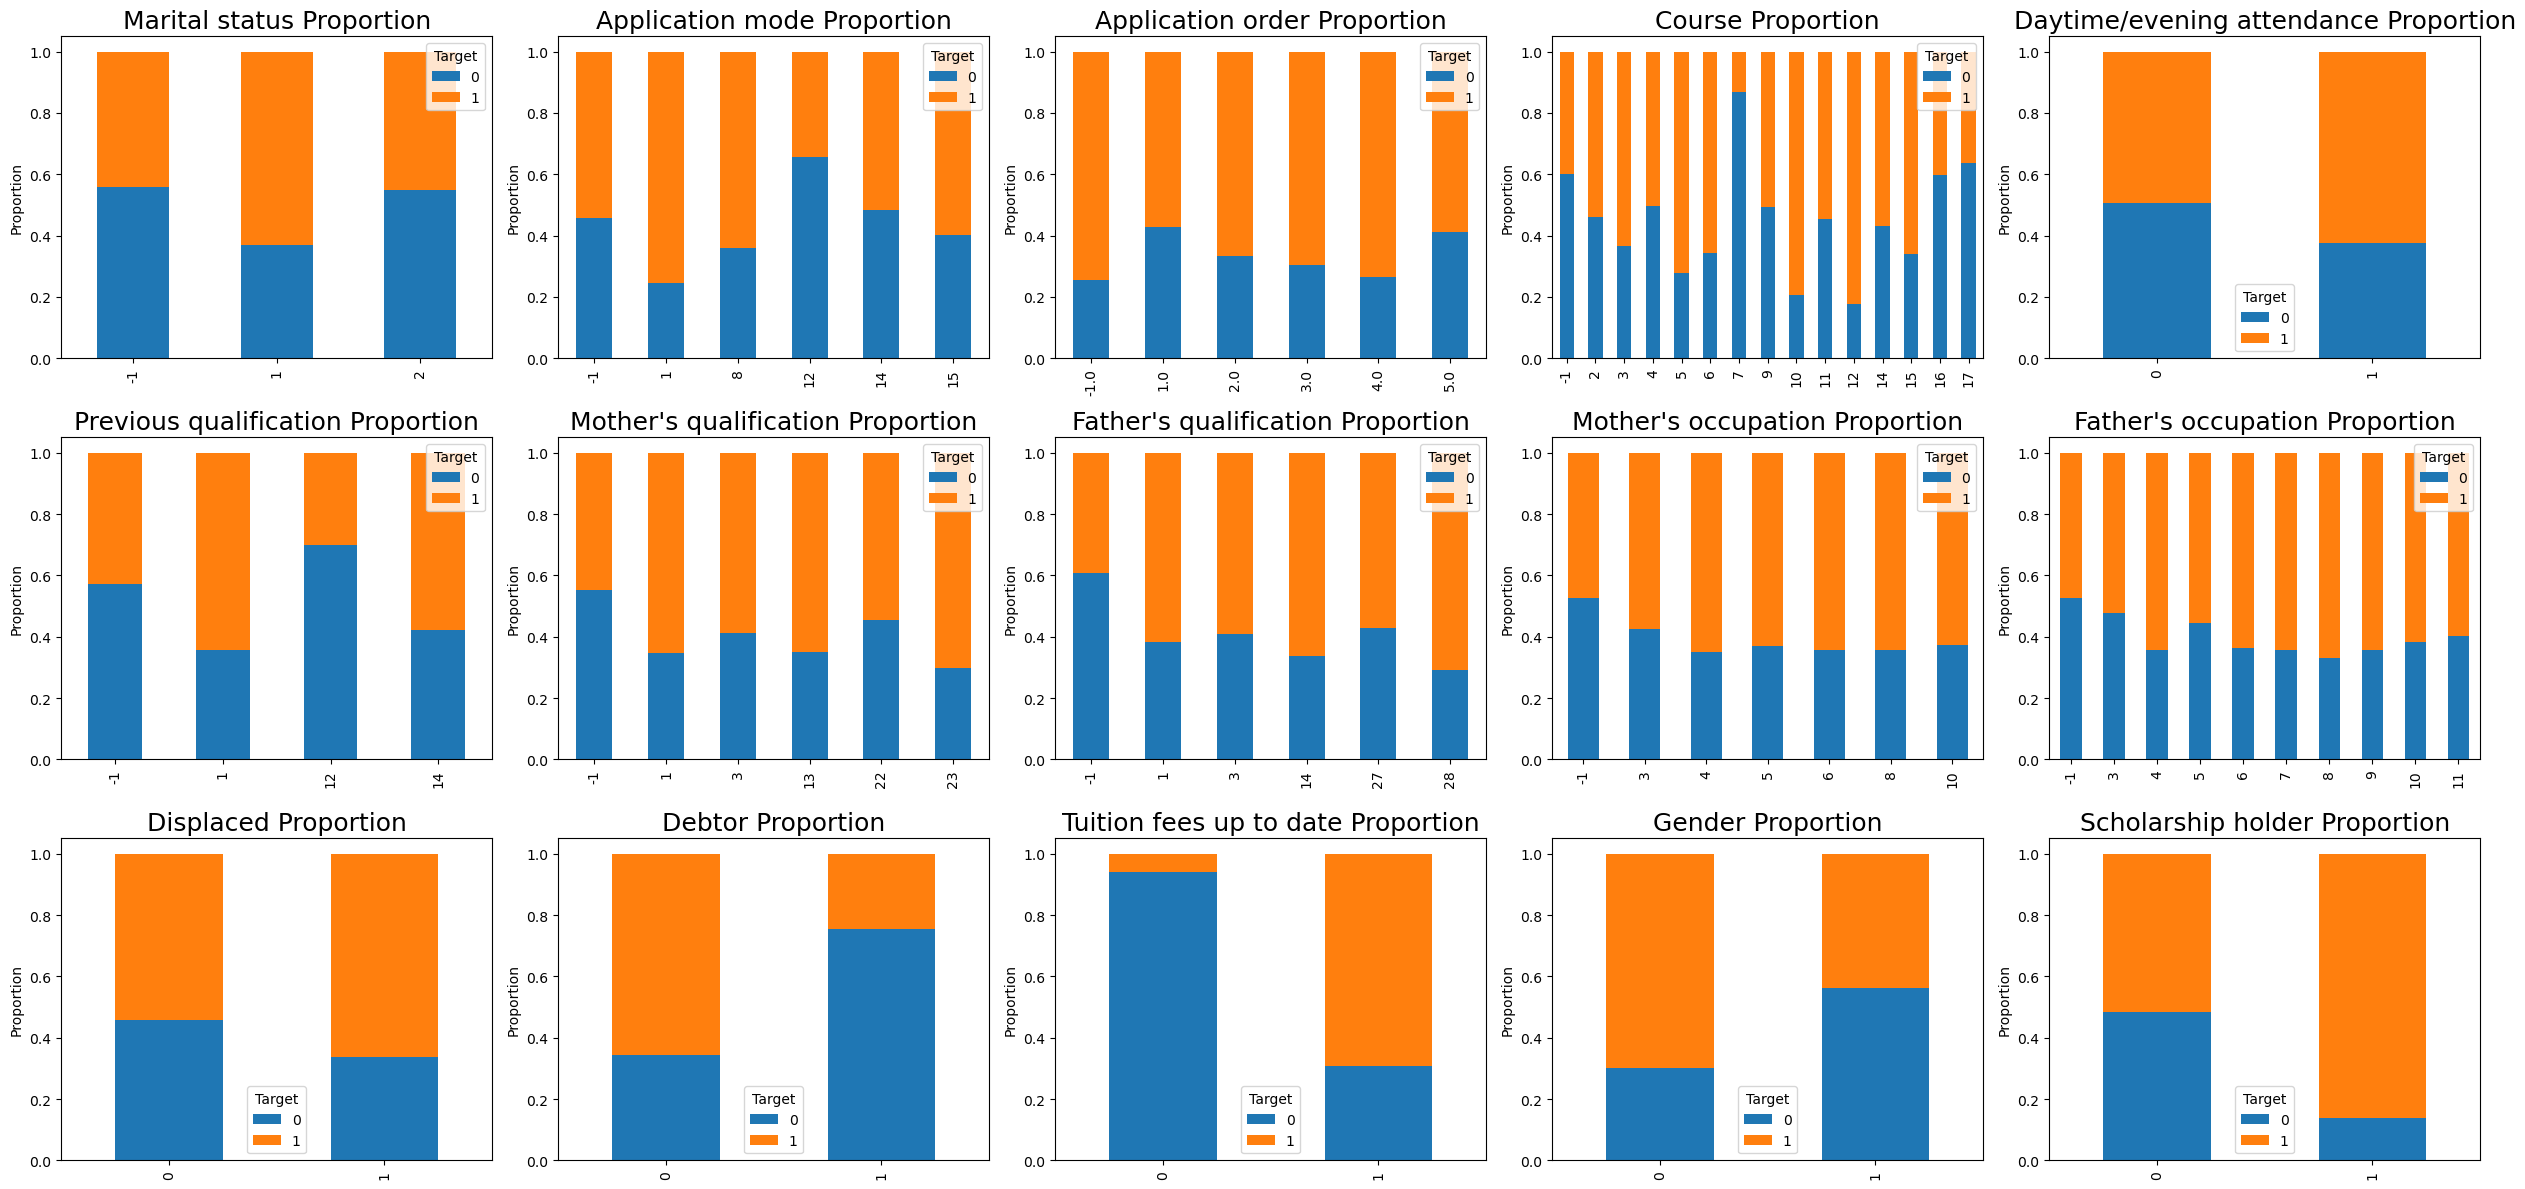

In [28]:
import matplotlib.pyplot as plt

# Create a 2x9 grid of subplots for the bar charts (since we only want to show proportions)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 12))

# Select all categorical columns except Target
selected_cols = [
    col
    for col in categorical_cols
    if col not in ["Target", "International", "Educational special needs"]
]

# Loop through the selected columns and create a bar chart for proportion in each subplot
for i in range(len(selected_cols)):
    row = i // 5
    col = i % 5
    counts = (
        students_df_cleaned.groupby([selected_cols[i], "Target"])["Course"]
        .count()
        .unstack()
    )
    counts_norm = counts.apply(lambda x: x / x.sum(), axis=1)
    counts_norm.plot(kind="bar", stacked=True, ax=axes[row][col])
    axes[row][col].set_title(selected_cols[i] + " Proportion", fontsize=18)
    axes[row][col].set_xlabel("")
    axes[row][col].set_ylabel("Proportion")
    axes[row][col].legend(title="Target")

# Adjust the spacing between subplots and display the figure
plt.tight_layout()
plt.show()

In [29]:
# Loop through selected columns
for col in selected_cols:

    # Group data by column and Target, then unstack
    freq_df = students_df_cleaned.groupby([col, "Target"]).size().unstack()

    # Rename columns and reset index
    freq_df.columns = ["Dropout", "Graduate"]
    freq_df = freq_df.reset_index()

    # Compute total and percentage for each Target
    freq_df["Total"] = freq_df["Dropout"] + freq_df["Graduate"]
    freq_df["Percent Dropout"] = (freq_df["Dropout"] / freq_df["Total"] * 100).round(
        2
    ).fillna("-").astype(str) + "%"
    freq_df["Percent Graduate"] = (freq_df["Graduate"] / freq_df["Total"] * 100).round(
        2
    ).fillna("-").astype(str) + "%"

    # Rearrange and rename columns, fill NaN values with '-'
    freq_df = freq_df[
        [col, "Graduate", "Percent Graduate", "Dropout", "Percent Dropout"]
    ]
    freq_df.columns = [col, "Graduate", "Percent", "Dropout", "Percent"]
    freq_df = freq_df.fillna("-")

    # Print the resulting table
    print(freq_df.to_string(index=False), "\n\n")

 Marital status  Graduate Percent  Dropout Percent
             -1        46  44.23%       58  55.77%
              1      2015  62.99%     1184  37.01%
              2       148  45.26%      179  54.74% 


 Application mode  Graduate Percent  Dropout Percent
               -1       244   54.1%      207   45.9%
                1      1063   75.5%      345   24.5%
                8       457   64.1%      256   35.9%
               12       229  34.49%      435  65.51%
               14       122  51.48%      115  48.52%
               15        94  59.87%       63  40.13% 


 Application order  Graduate Percent  Dropout Percent
              -1.0        90  74.38%       31  25.62%
               1.0      1409  57.23%     1053  42.77%
               2.0       301  66.74%      150  33.26%
               3.0       173  69.48%       76  30.52%
               4.0       160  73.39%       58  26.61%
               5.0        76  58.91%       53  41.09% 


 Course  Graduate Percent  Dropout Per

#### Distribution of Target with quantitative variables


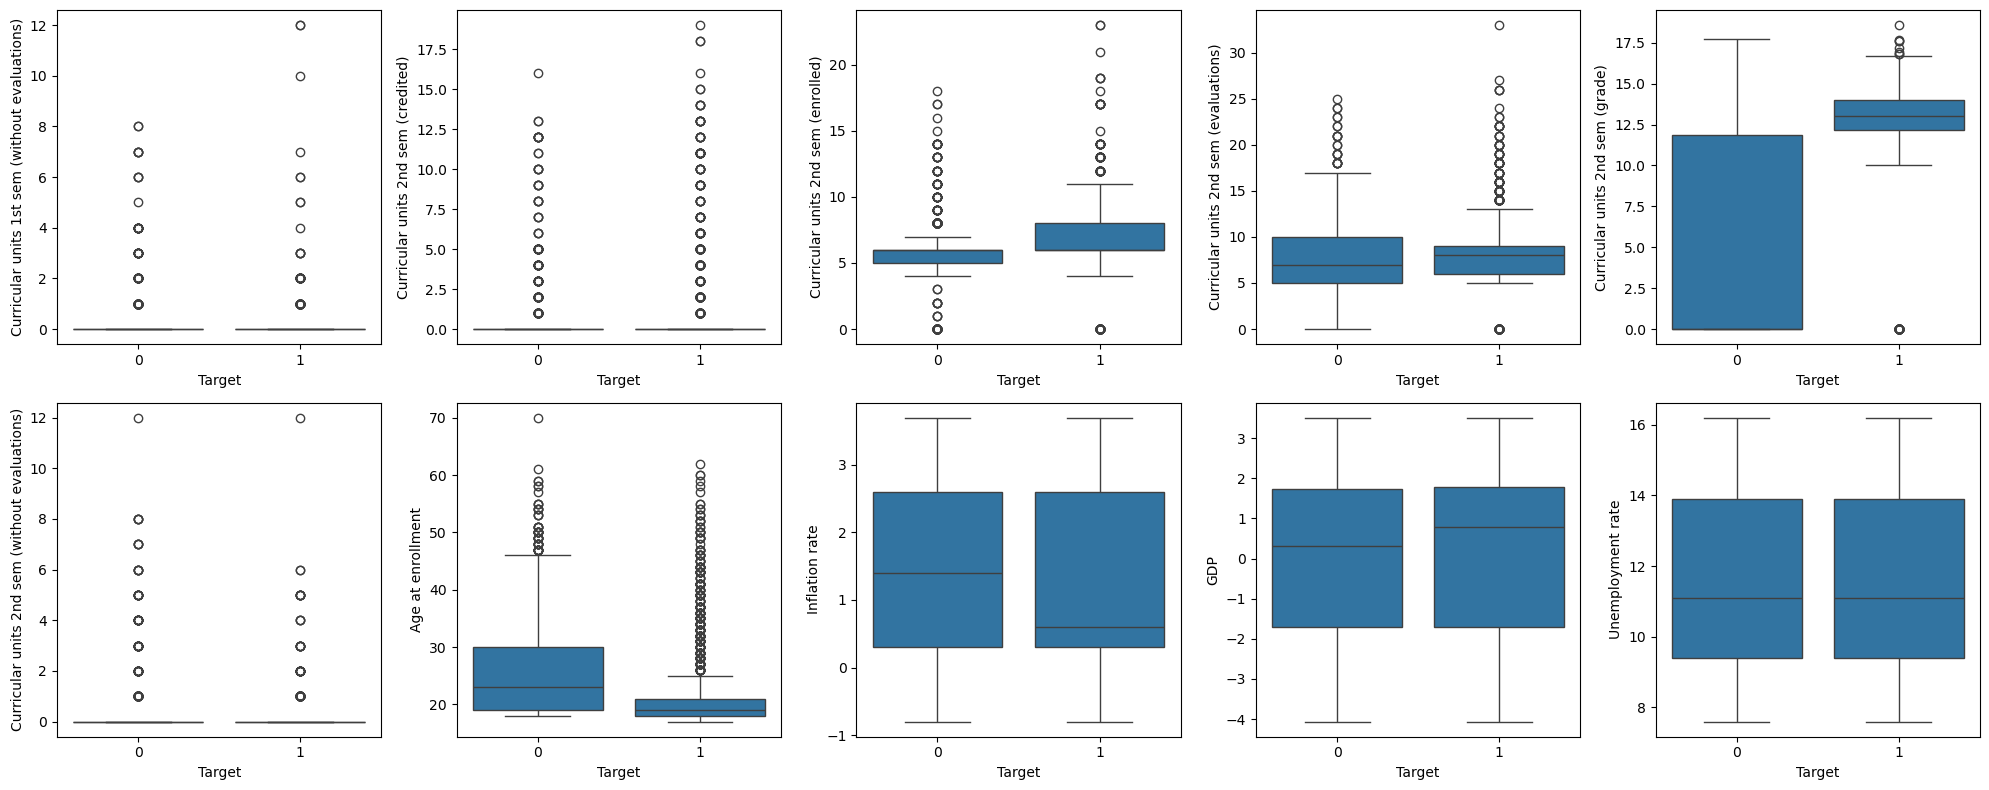

In [30]:
# Create a 4x4 grid of subplots for the boxplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

# Loop through the quantitative columns and create a boxplot for each one
for i in range(len(quantitative_cols)):
    row = i // 5
    col = i % 5
    sns.boxplot(
        x="Target", y=quantitative_cols[i], data=students_df_cleaned, ax=axes[row][col]
    )

# Adjust the spacing between subplots and display the figure
plt.tight_layout()
plt.show()

In [31]:
# Group the data by 'Target' and compute the numerical summary
num_summary = students_df_cleaned.groupby("Target")[quantitative_cols].describe().T

# Customize the output
pd.set_option("display.float_format", lambda x: "%.2f" % x)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.max_rows", 1000)

# Print the numerical summary
num_summary

Target                                                     0       1
Curricular units 1st sem (without evaluations) count 1421.00 2209.00
                                               mean     0.19    0.09
                                               std      0.79    0.59
                                               min      0.00    0.00
                                               25%      0.00    0.00
                                               50%      0.00    0.00
                                               75%      0.00    0.00
                                               max      8.00   12.00
Curricular units 2nd sem (credited)            count 1421.00 2209.00
                                               mean     0.45    0.67
                                               std      1.68    2.21
                                               min      0.00    0.00
                                               25%      0.00    0.00
                                               50%      0.00    0.00
                                               75%      0.00    0.00
                                               max     16.00   19.00
Curricular units 2nd sem (enrolled)            count 1421.00 2209.00
                                               mean     5.78    6.63
                                               std      2.11    2.30
                                               min      0.00    0.00
                                               25%      5.00    6.00
                                               50%      6.00    6.00
                                               75%      6.00    8.00
                                               max     18.00   23.00
Curricular units 2nd sem (evaluations)         count 1421.00 2209.00
                                               mean     7.17    8.14
                                               std      4.82    3.25
                                               min      0.00    0.00
                                               25%      5.00    6.00
                                               50%      7.00    8.00
                                               75%     10.00    9.00
                                               max     25.00   33.00
Curricular units 2nd sem (grade)               count 1421.00 2209.00
                                               mean     5.90   12.70
                                               std      6.12    2.69
                                               min      0.00    0.00
                                               25%      0.00   12.17
                                               50%      0.00   13.00
                                               75%     11.83   14.00
                                               max     17.71   18.57
Curricular units 2nd sem (without evaluations) count 1421.00 2209.00
                                               mean     0.24    0.08
                                               std      0.99    0.52
                                               min      0.00    0.00
                                               25%      0.00    0.00
                                               50%      0.00    0.00
                                               75%      0.00    0.00
                                               max     12.00   12.00
Age at enrollment                              count 1421.00 2209.00
                                               mean    26.07   21.78
                                               std      8.70    6.69
                                               min     18.00   17.00
                                               25%     19.00   18.00
                                               50%     23.00   19.00
                                               75%     30.00   21.00
                                               max     70.00   62.00
Inflation rate                                 count 1421.00 2209.0

### For Q2, the response variable is 'Scholarship holder', so we need to analyse the independent variables with Scholarship holder


#### Distribution of Scholarship holder variable


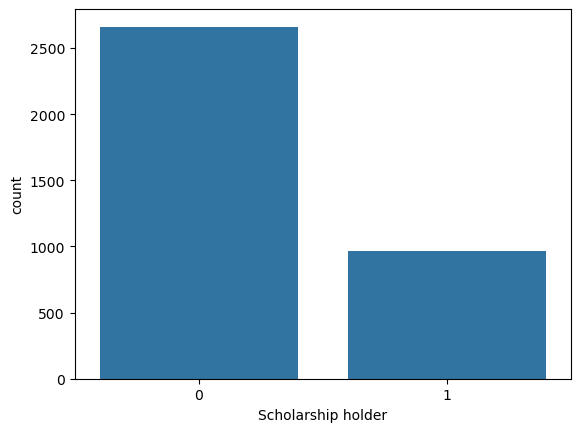

In [32]:
# Check the distribution of the "Scholarship holder" variable
sns.countplot(x="Scholarship holder", data=students_df_cleaned)
plt.show()

In [33]:
# Frequency table for Scholarship holder
students_df_cleaned["Scholarship holder"].value_counts()

Scholarship holder
0    2661
1     969
Name: count, dtype: int64

#### Distribution of Scholarship holder with quantitative variables


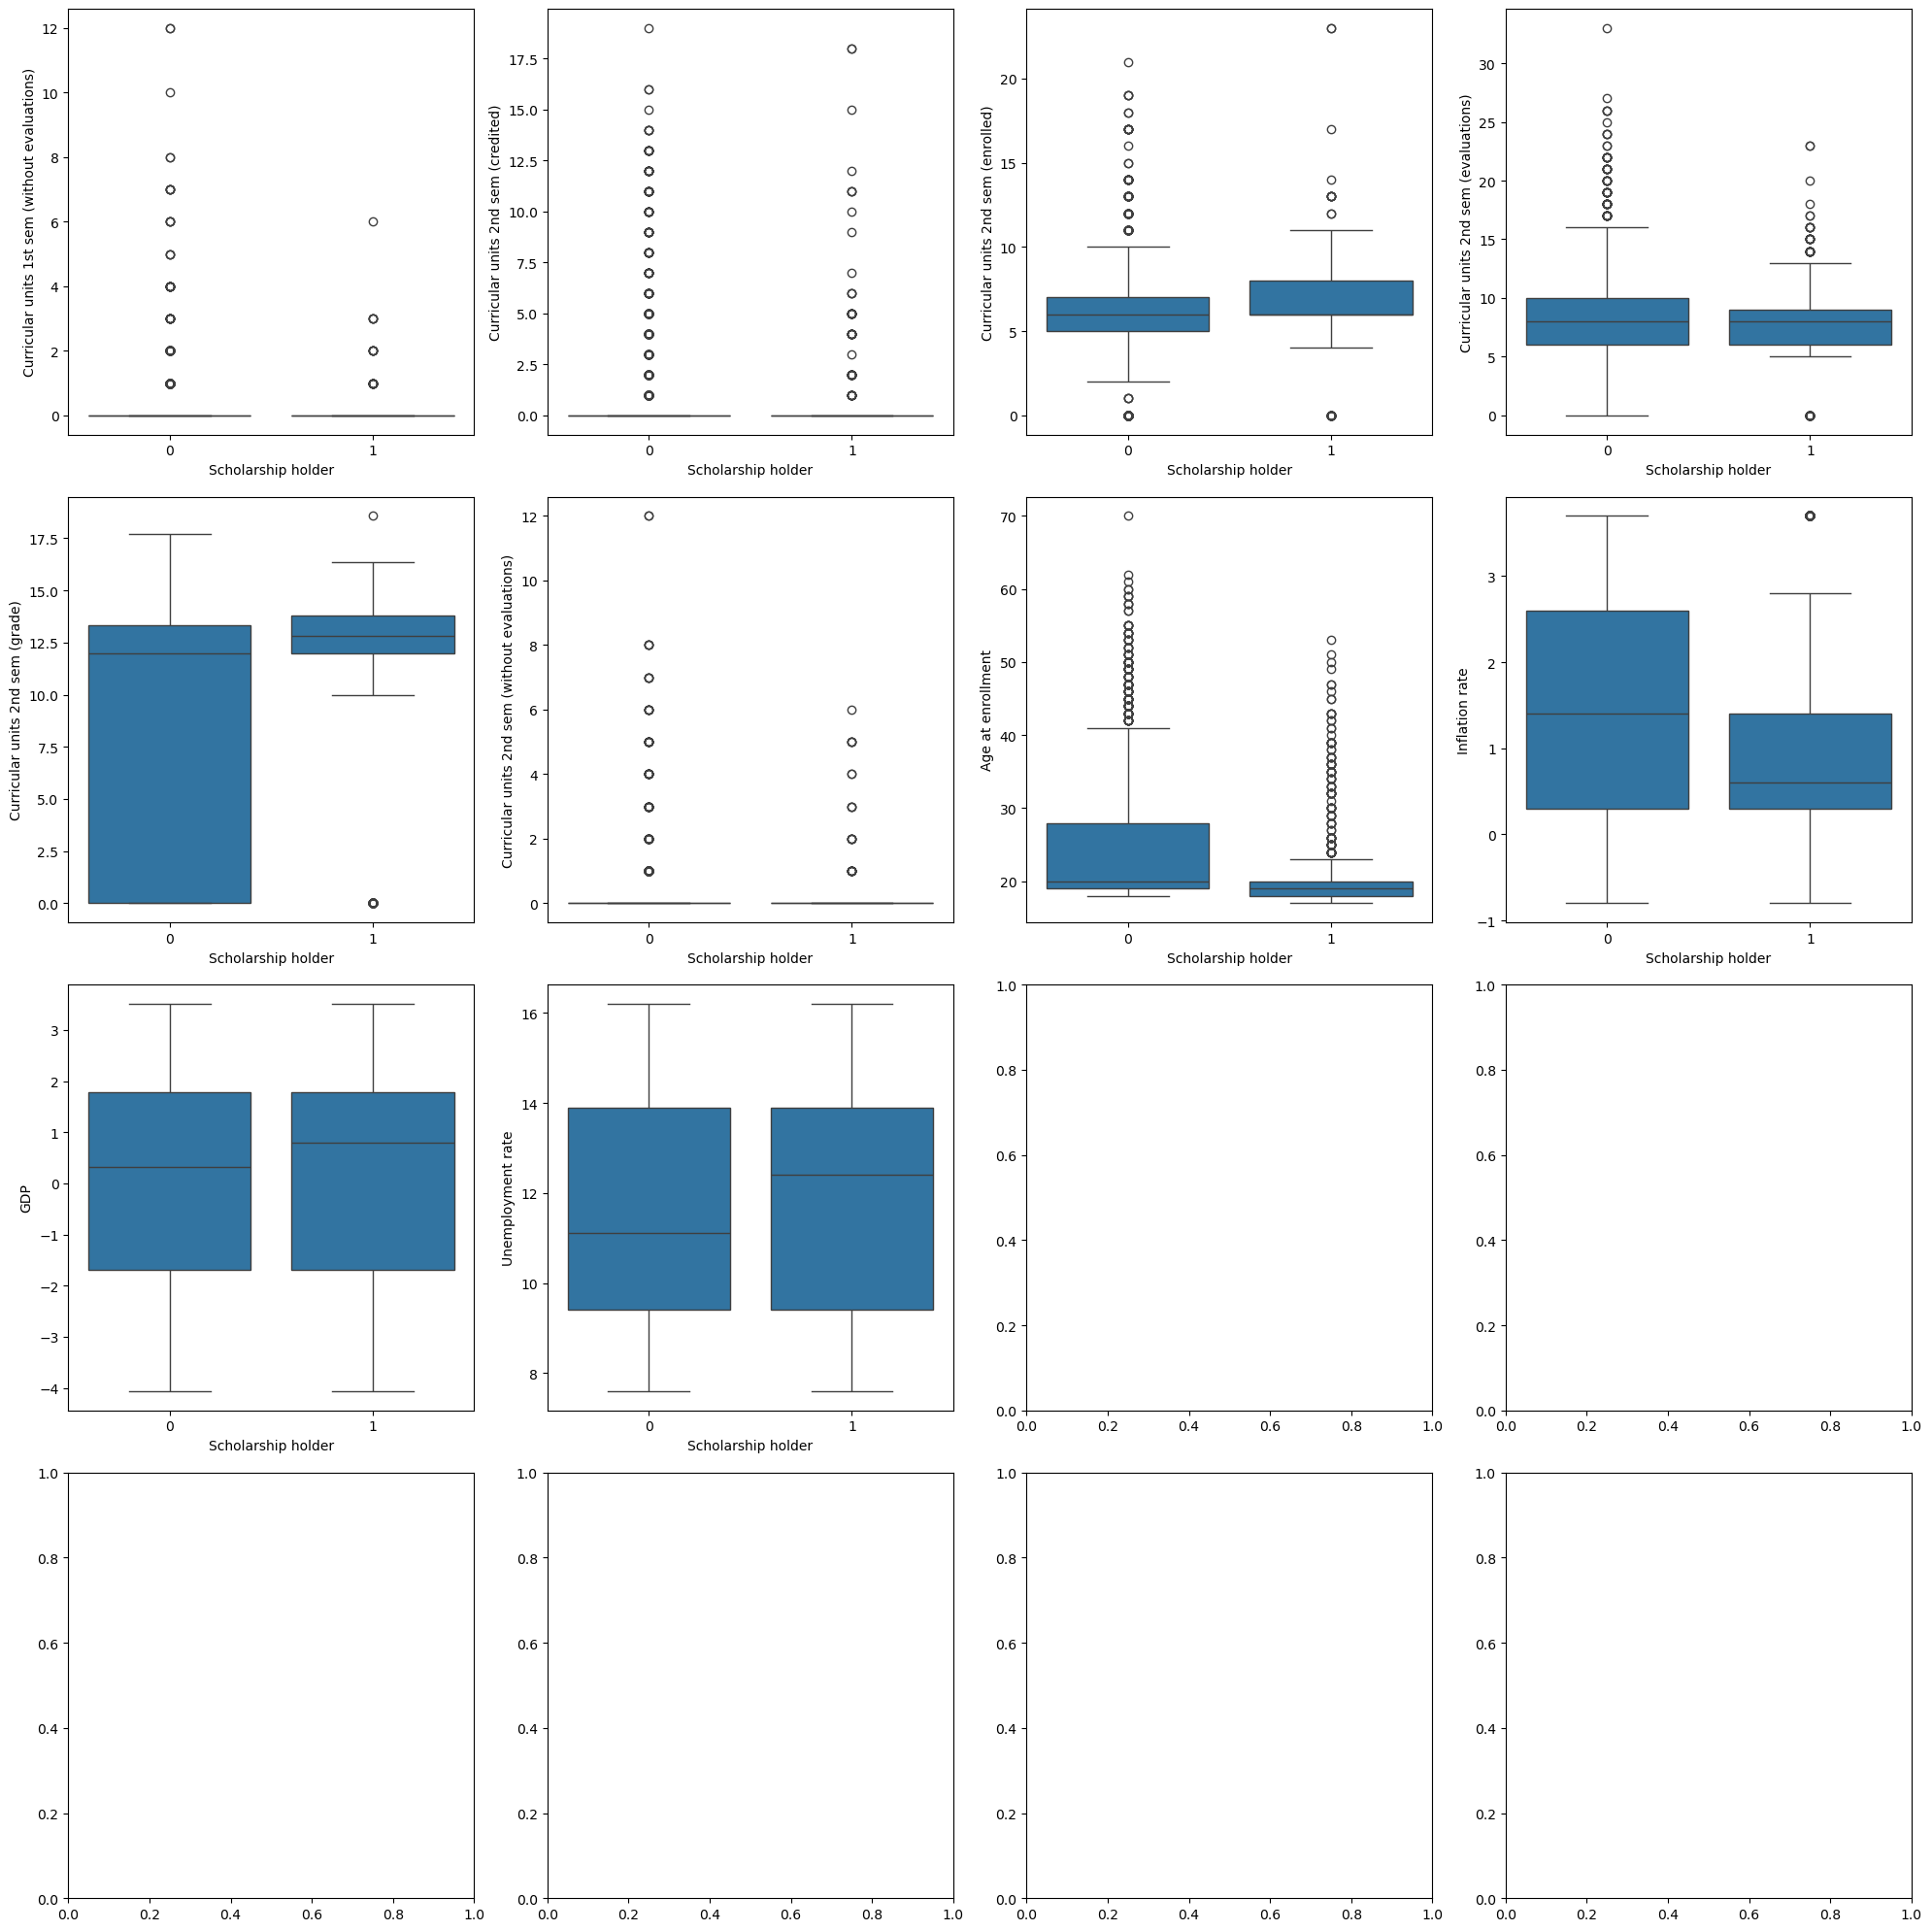

In [34]:
# Create a 4x4 grid of subplots for the boxplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

# Loop through the quantitative columns and create a boxplot for each one
for i in range(len(quantitative_cols)):
    row = i // 4
    col = i % 4
    sns.boxplot(
        x="Scholarship holder",
        y=quantitative_cols[i],
        data=students_df_cleaned,
        ax=axes[row][col],
    )

# Adjust the spacing between subplots and display the figure
plt.tight_layout()
plt.show()

In [35]:
# Group the data by 'Scholarship holder' and compute the numerical summary
num_summary = (
    students_df_cleaned.groupby("Scholarship holder")[quantitative_cols].describe().T
)

# Customize the output
pd.set_option("display.float_format", lambda x: "%.2f" % x)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.max_rows", 1000)

# Print the numerical summary
print(num_summary)

Scholarship holder                                         0      1
Curricular units 1st sem (without evaluations) count 2661.00 969.00
                                               mean     0.16   0.05
                                               std      0.76   0.34
                                               min      0.00   0.00
                                               25%      0.00   0.00
                                               50%      0.00   0.00
                                               75%      0.00   0.00
                                               max     12.00   6.00
Curricular units 2nd sem (credited)            count 2661.00 969.00
                                               mean     0.68   0.32
                                               std      2.17   1.51
                                               min      0.00   0.00
                                               25%      0.00   0.00
                                               5

#### Distribution of Scholarship holder with other Categorical Variables


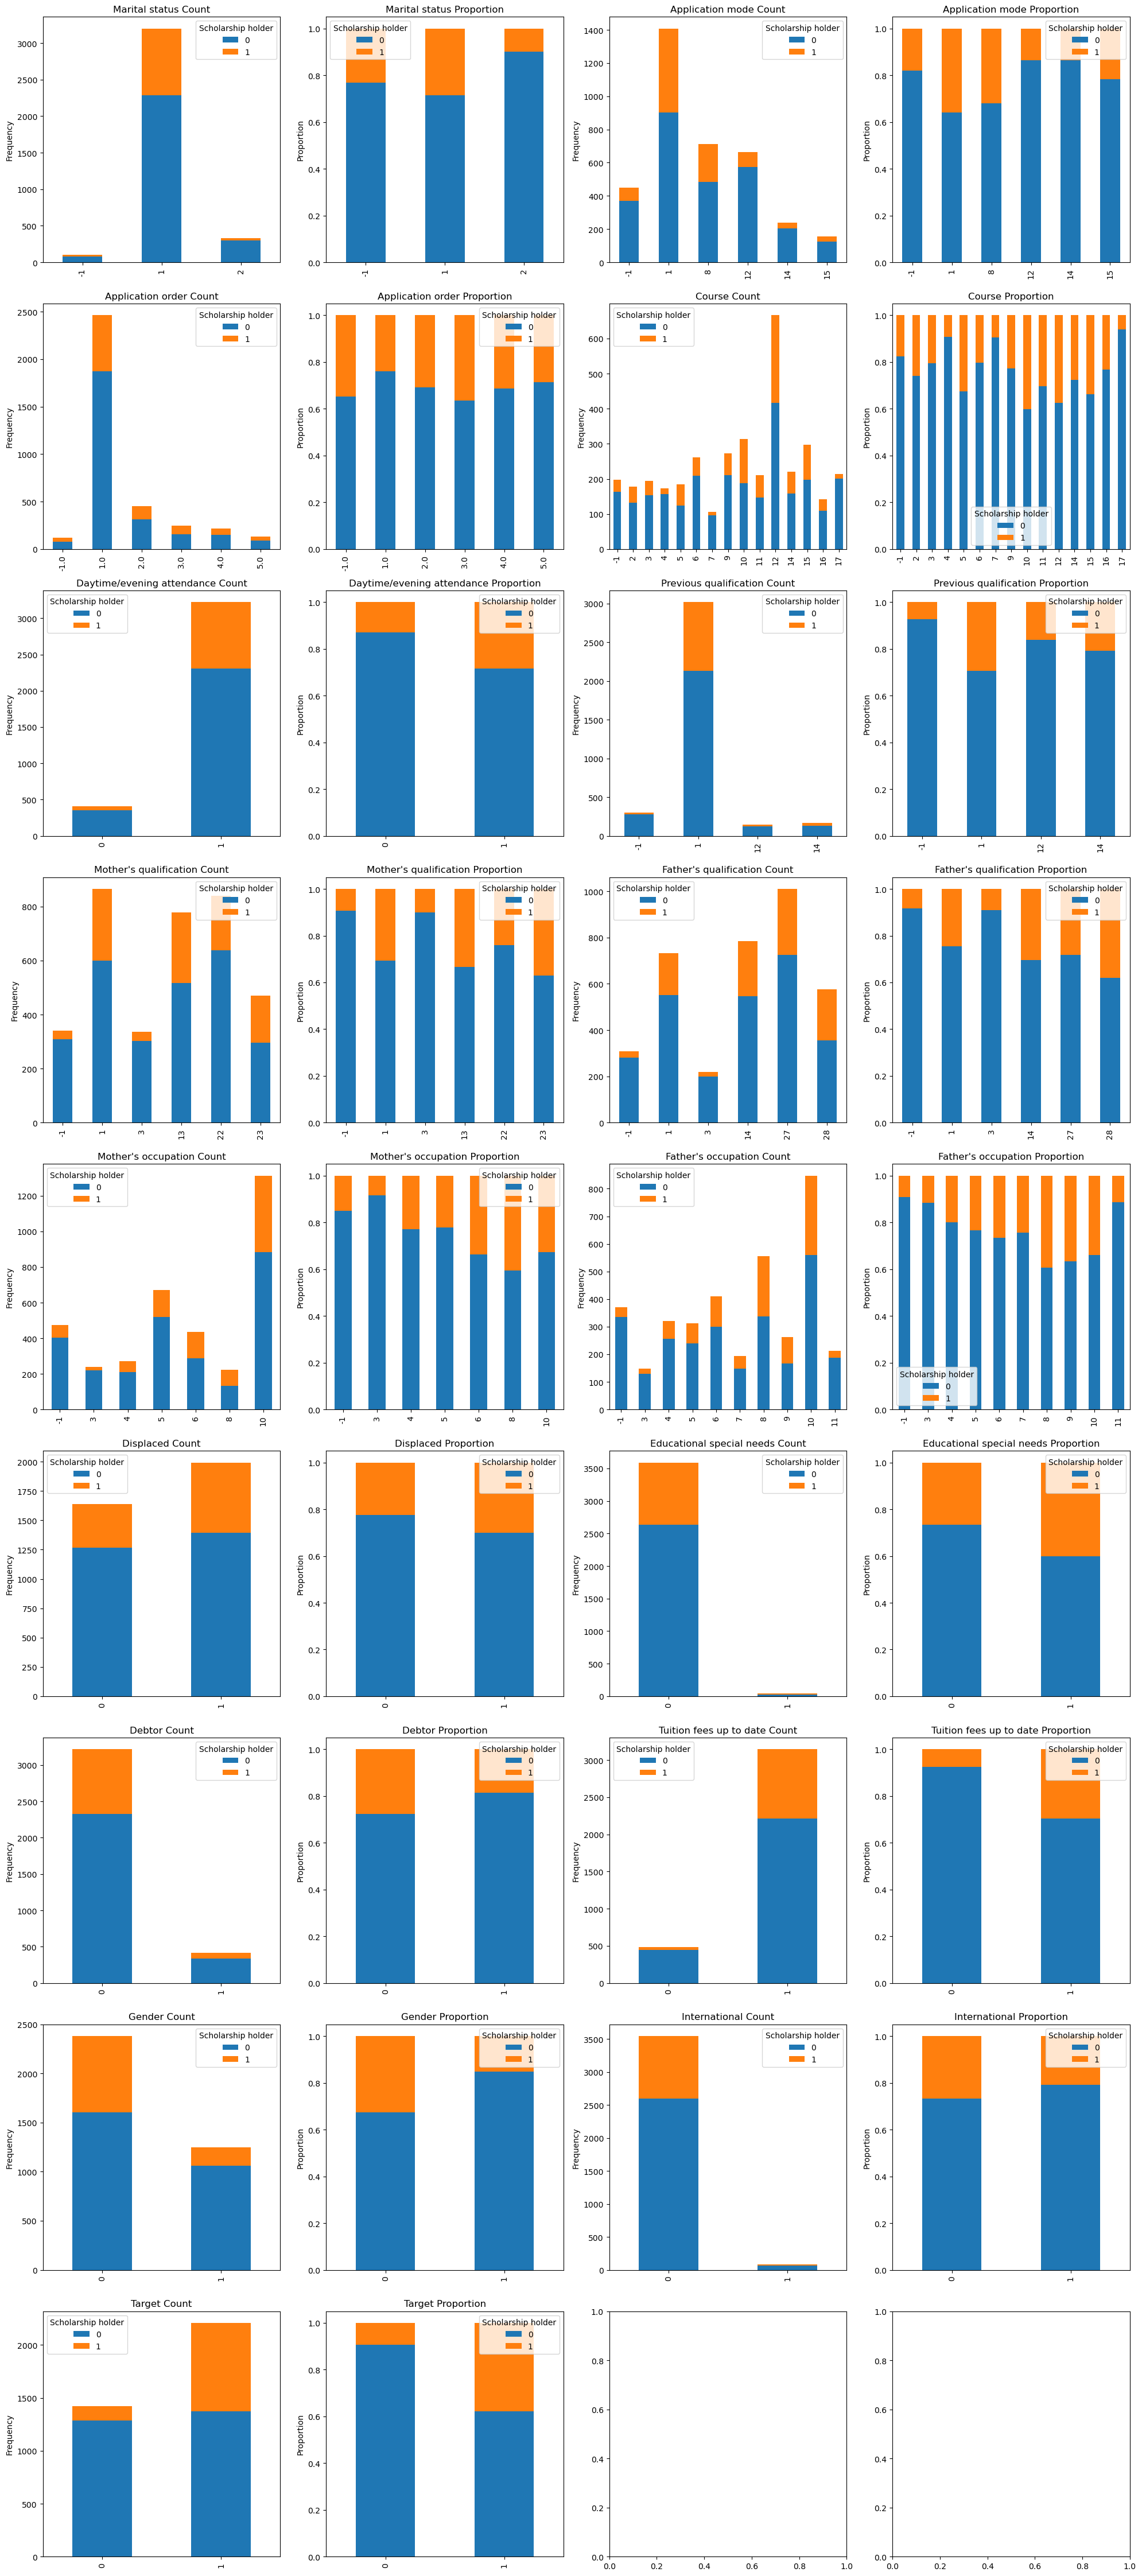

In [36]:
# Create a 9x4 grid of subplots for the bar charts
fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(20, 45))

# Select all categorical columns except Scholarship holder
selected_cols = [col for col in categorical_cols if col != "Scholarship holder"]

# Loop through the categorical columns and create a bar chart for each one
for i in range(len(selected_cols)):
    row1 = i // 2
    col1 = (i % 2) * 2
    col2 = col1 + 1
    counts = (
        students_df_cleaned.groupby([selected_cols[i], "Scholarship holder"])["Course"]
        .count()
        .unstack()
    )
    counts_norm = counts.apply(lambda x: x / x.sum(), axis=1)
    counts.plot(kind="bar", stacked=True, ax=axes[row1][col1])
    axes[row1][col1].set_title(selected_cols[i] + " Count", fontsize=12)
    axes[row1][col1].set_xlabel("")
    axes[row1][col1].set_ylabel("Frequency")
    axes[row1][col1].legend(title="Scholarship holder")

    counts_norm.plot(kind="bar", stacked=True, ax=axes[row1][col2])
    axes[row1][col2].set_title(selected_cols[i] + " Proportion", fontsize=12)
    axes[row1][col2].set_xlabel("")
    axes[row1][col2].set_ylabel("Proportion")
    axes[row1][col2].legend(title="Scholarship holder")


# Adjust the spacing between subplots and display the figure
plt.tight_layout()
plt.show()

In [37]:
# Loop through categorical columns
for col in selected_cols:

    # Group data by column and Scholarship holder, then unstack
    freq_df = students_df_cleaned.groupby([col, "Scholarship holder"]).size().unstack()

    # Rename columns and reset index
    freq_df.columns = ["No Scholarship", "Scholarship"]
    freq_df = freq_df.reset_index()

    # Compute total and percentage for each Scholarship holder
    freq_df["Total"] = freq_df["No Scholarship"] + freq_df["Scholarship"]
    freq_df["Percent No Scholarship"] = (
        freq_df["No Scholarship"] / freq_df["Total"] * 100
    ).round(2).fillna("-").astype(str) + "%"
    freq_df["Percent Scholarship"] = (
        freq_df["Scholarship"] / freq_df["Total"] * 100
    ).round(2).fillna("-").astype(str) + "%"

    # Rearrange and rename columns, fill NaN values with '-'
    freq_df = freq_df[
        [
            col,
            "Scholarship",
            "Percent Scholarship",
            "No Scholarship",
            "Percent No Scholarship",
        ]
    ]
    freq_df.columns = [col, "Scholarship", "Percent", "No Scholarship", "Percent"]
    freq_df = freq_df.fillna("-")

    # Print the resulting table
    print(freq_df.to_string(index=False), "\n\n")

 Marital status  Scholarship Percent  No Scholarship Percent
             -1           24  23.08%              80  76.92%
              1          913  28.54%            2286  71.46%
              2           32   9.79%             295  90.21% 


 Application mode  Scholarship Percent  No Scholarship Percent
               -1           81  17.96%             370  82.04%
                1          504   35.8%             904   64.2%
                8          228  31.98%             485  68.02%
               12           90  13.55%             574  86.45%
               14           32   13.5%             205   86.5%
               15           34  21.66%             123  78.34% 


 Application order  Scholarship Percent  No Scholarship Percent
             -1.00           42  34.71%              79  65.29%
              1.00          592  24.05%            1870  75.95%
              2.00          139  30.82%             312  69.18%
              3.00           91  36.55%             1

### Clustering


#### Elbow method for K-Means Clustering of Unscaled and Scaled Quantitative Variables


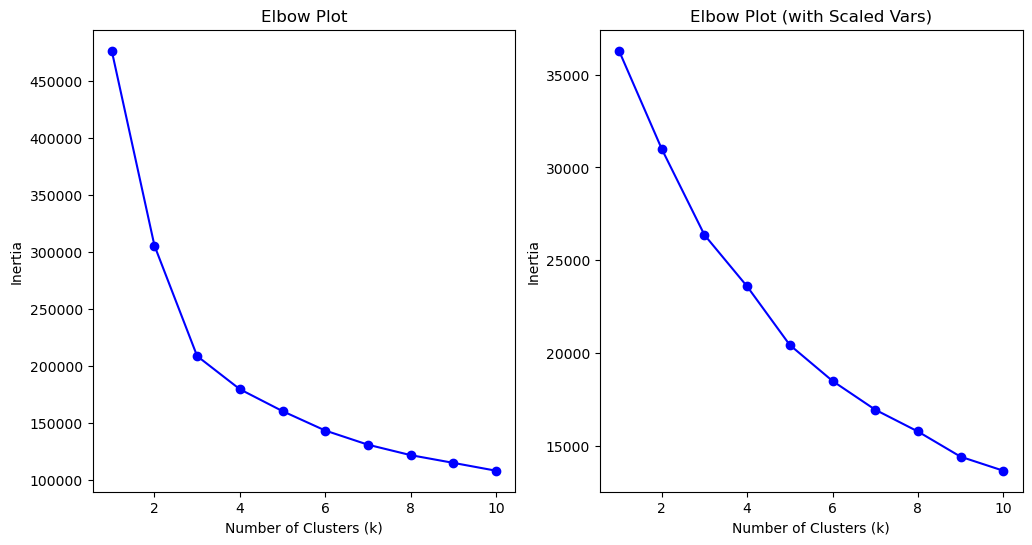

In [38]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Create a copy of the original dataset
num_vars = students_df_cleaned[quantitative_cols].copy()

# Standardize the data
scaler = StandardScaler()
num_vars_scaled = scaler.fit_transform(num_vars)
num_vars_scaled = pd.DataFrame(num_vars_scaled, columns=quantitative_cols)

# Set up a range of k values to try
k_values = range(1, 11)

# Calculate the inertia for each value of k
inertias = []
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(num_vars)
    inertias.append(model.inertia_)

# Visualize the elbow plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(k_values, inertias, "bo-")
ax1.set_xlabel("Number of Clusters (k)")
ax1.set_ylabel("Inertia")
ax1.set_title("Elbow Plot")

# Calculate the inertia for each value of k
inertias = []
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(num_vars_scaled)
    inertias.append(model.inertia_)

# Visualize the elbow plot
ax2.plot(k_values, inertias, "bo-")
ax2.set_xlabel("Number of Clusters (k)")
ax2.set_ylabel("Inertia")
ax2.set_title("Elbow Plot (with Scaled Vars)")

plt.show()

#### Building unsupervised k-means clustering model


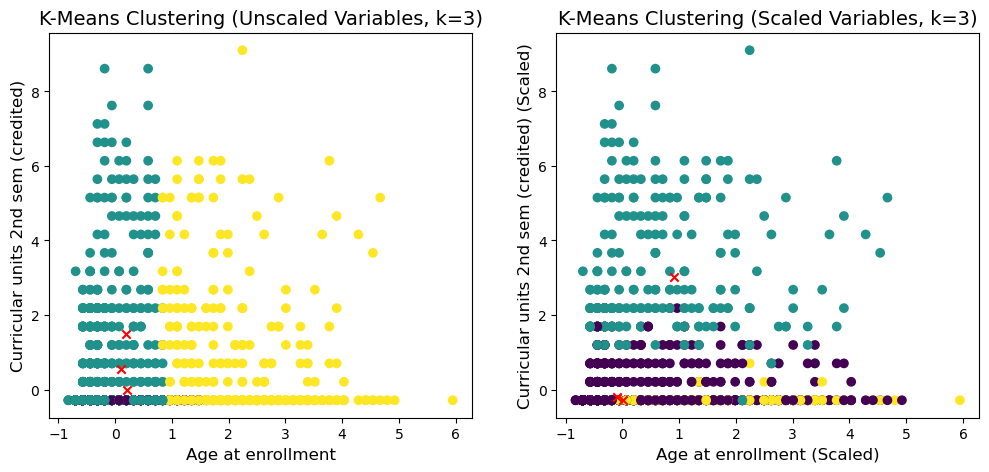

In [39]:
# Set the optimal k values based on the elbow methods above
k_optimal_unscaled = 3
k_optimal_scaled = 3

# Build the unscaled quantitative variables model
model_unscaled = KMeans(n_clusters=k_optimal_unscaled, random_state=42, n_init=10)
model_unscaled.fit(num_vars)

# Build the scaled quantitative variables model
model_scaled = KMeans(n_clusters=k_optimal_scaled, random_state=42, n_init=10)
model_scaled.fit(num_vars_scaled)

# Get the cluster labels for each data point
labels_unscaled = model_unscaled.labels_
labels_scaled = model_scaled.labels_

# Visualize the clusters using scatter points
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(12, 5))

# Unscaled Variables Model
ax2.scatter(
    num_vars_scaled.iloc[:, num_vars.columns.get_loc("Age at enrollment")],
    num_vars_scaled.iloc[
        :, num_vars.columns.get_loc("Curricular units 2nd sem (credited)")
    ],
    c=labels_unscaled,
)
centers = model_unscaled.cluster_centers_
ax2.scatter(centers[:, 0], centers[:, 1], c="red", marker="x")
ax2.set_title("K-Means Clustering (Unscaled Variables, k=3)", fontsize=14)
ax2.set_xlabel("Age at enrollment", fontsize=12)
ax2.set_ylabel("Curricular units 2nd sem (credited)", fontsize=12)

# Scaled Variables Model
ax1.scatter(
    num_vars_scaled.iloc[:, num_vars.columns.get_loc("Age at enrollment")],
    num_vars_scaled.iloc[
        :, num_vars.columns.get_loc("Curricular units 2nd sem (credited)")
    ],
    c=labels_scaled,
)
centers = model_scaled.cluster_centers_
ax1.scatter(centers[:, 0], centers[:, 1], c="red", marker="x")
ax1.set_title("K-Means Clustering (Scaled Variables, k=3)", fontsize=14)
ax1.set_xlabel("Age at enrollment (Scaled)", fontsize=12)
ax1.set_ylabel("Curricular units 2nd sem (credited) (Scaled)", fontsize=12)

plt.show()

### Principle Component Analysis


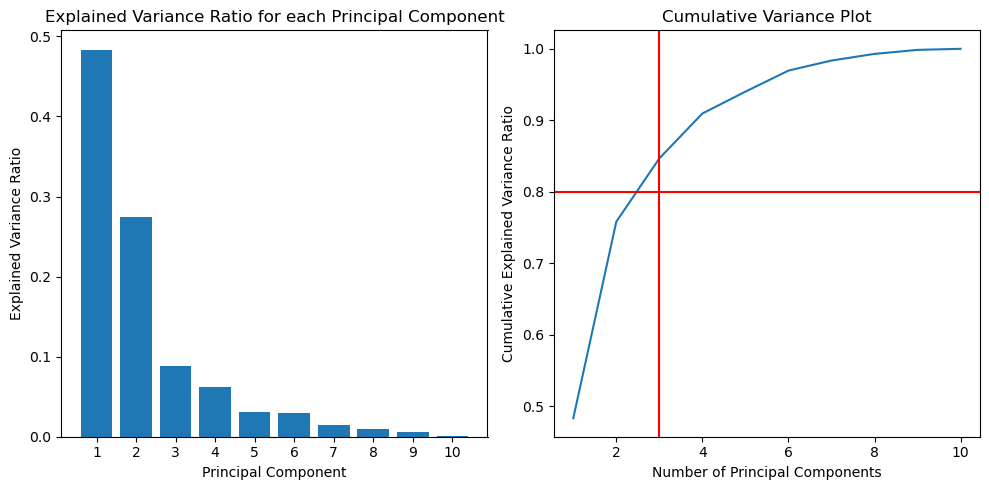

In [40]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Split the dataset into quantitative variables only

# Using all columns except Target, we need 6 PCs to cummulatively explain 80% of the variance
# num_vars = students_df.select_dtypes(include=np.number)

# Using predefined quantitative columns, we need 3 PCs to cummulatively explain 80% of the variance
num_vars = students_df_cleaned[quantitative_cols]

# Standardize the data
scaler = StandardScaler()
num_vars_scaled = scaler.fit_transform(num_vars)

# Perform PCA on non-scaled variables
pca = PCA()
pca.fit(num_vars)

# Get the eigenvalues and eigenvectors
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Create a bar graph of the explained variance ratio for each principal component
ax1.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
ax1.set_xticks(range(1, len(explained_variance_ratio) + 1))
ax1.set_xlabel("Principal Component")
ax1.set_ylabel("Explained Variance Ratio")
ax1.set_title("Explained Variance Ratio for each Principal Component")

# Plot the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
ax2.plot(range(1, len(cumulative_variance_ratio) + 1, 1), cumulative_variance_ratio)

# add a horizontal line at 80% cutoff
ax2.axhline(y=0.8, color="r", linestyle="-")

# find the index where the cumulative variance first exceeds 80%
variance_80 = next(
    idx
    for idx, cum_var in enumerate(pca.explained_variance_ratio_.cumsum())
    if cum_var > 0.8
)

# add a vertical line at the intersection point
ax2.axvline(x=variance_80 + 1, color="r", linestyle="-")

ax2.set_title("Cumulative Variance Plot")
ax2.set_xlabel("Number of Principal Components")
ax2.set_ylabel("Cumulative Explained Variance Ratio")

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [41]:
explained_variance_ratio

array([0.48345533, 0.27480528, 0.08855581, 0.06272793, 0.03058525,
       0.02940525, 0.01407543, 0.00928828, 0.00560215, 0.00149929])

In [42]:
import plotly.graph_objs as go

# Fit PCA with 3 principal components based on the cumulative variance graph
pca = PCA(n_components=3)
pc_scores = pca.fit_transform(num_vars)

# Define color scheme for each PC
color_scheme = [
    "steelblue",
    "darkorange",
    "forestgreen",
    "red",
    "purple",
    "gray",
    "teal",
    "coral",
    "goldenrod",
    "pink",
]

# Create a bar plot to visualize variance explained by each PC for each variable
fig = go.Figure()
for i in range(len(pca.explained_variance_ratio_)):
    fig.add_trace(
        go.Bar(
            x=num_vars.columns,
            y=pca.components_[i],
            name=f"PC{i+1}",
            # text=[f'PC{i+1}: {pca.explained_variance_ratio_[i]*100:.2f}%'],
            # textposition='auto',
            textfont=dict(size=7, color="white"),
            marker_color=color_scheme[i % len(color_scheme)],
        )
    )

fig.update_layout(
    barmode="stack",
    title="Variance Explained by Principal Components for Each Variable",
    xaxis_title="Variables",
    yaxis_title="Variance Explained",
    font=dict(size=14),
    plot_bgcolor="rgba(0,0,0,0)",
)
fig.show()

In [43]:
# Create a dictionary to store the loadings
loadings = {}

# Iterate through each principal component
for i, pc in enumerate(pca.components_):
    # Create a list to store the loadings of each variable
    loading_list = []
    # Iterate through each variable and its loading
    for j, var in enumerate(num_vars.columns):
        loading = pc[j]
        # Append the variable and its loading to the list
        loading_list.append((var, loading))
    # Sort the list based on the absolute value of the loading
    loading_list.sort(key=lambda x: abs(x[1]), reverse=True)
    # Add the sorted list to the dictionary
    loadings[f"PC{i+1}"] = loading_list

# Print out the loadings
for pc, loading_list in loadings.items():
    print(f"Principal Component {pc}:")
    for var, loading in loading_list:
        print(f"\t{var}: {loading:.3f}")
    print("\n")

Principal Component PC1:
	Age at enrollment: 0.969
	Curricular units 2nd sem (grade): -0.242
	Curricular units 2nd sem (credited): 0.044
	GDP: -0.024
	Unemployment rate: 0.011
	Curricular units 2nd sem (evaluations): -0.010
	Curricular units 2nd sem (without evaluations): 0.009
	Curricular units 1st sem (without evaluations): 0.008
	Inflation rate: 0.007
	Curricular units 2nd sem (enrolled): 0.002


Principal Component PC2:
	Curricular units 2nd sem (grade): 0.795
	Curricular units 2nd sem (evaluations): 0.502
	Curricular units 2nd sem (enrolled): 0.240
	Age at enrollment: 0.197
	Curricular units 2nd sem (credited): 0.138
	Unemployment rate: 0.017
	GDP: 0.007
	Inflation rate: -0.005
	Curricular units 1st sem (without evaluations): 0.005
	Curricular units 2nd sem (without evaluations): 0.004


Principal Component PC3:
	Curricular units 2nd sem (evaluations): 0.683
	Curricular units 2nd sem (grade): -0.539
	Curricular units 2nd sem (enrolled): 0.302
	Curricular units 2nd sem (credited): 

Code to display all the above information


C:\Users\IAMRO-PC\AppData\Local\Temp\ipykernel_8696\2802325881.py:86: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



<function matplotlib.pyplot.show(close=None, block=None)>

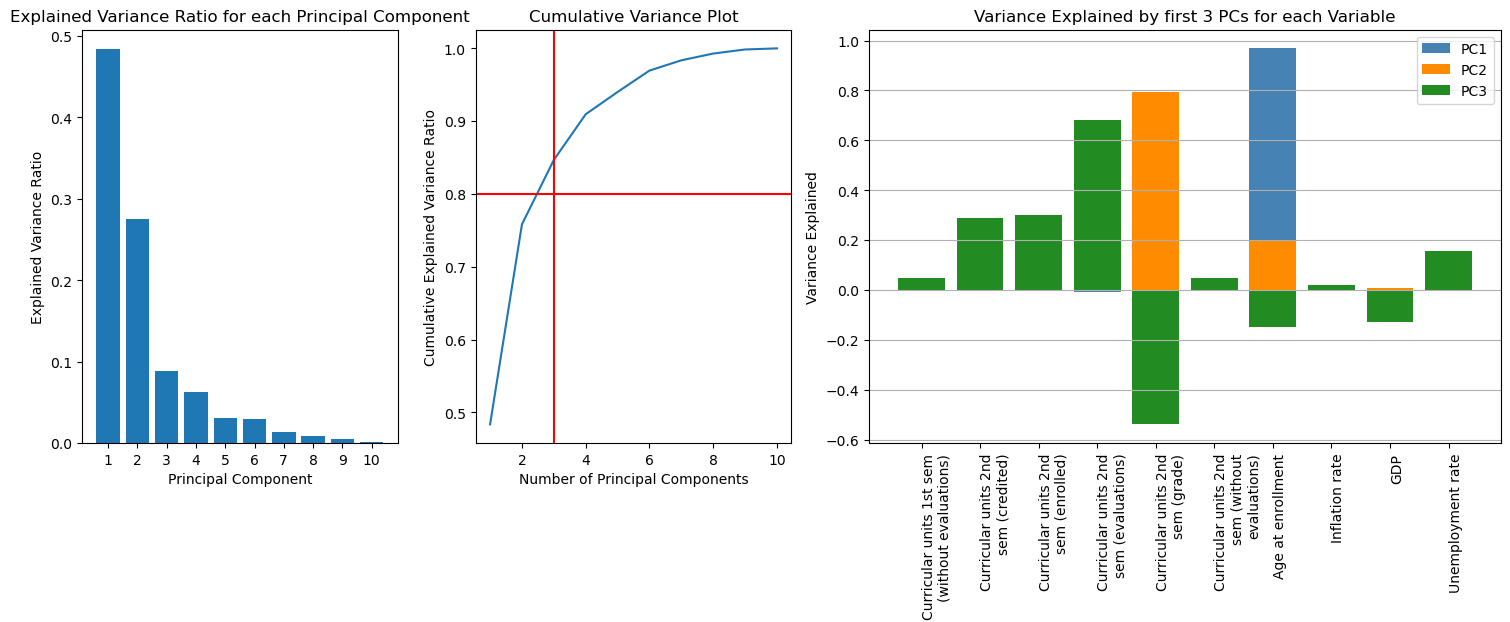

In [44]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Split the dataset into quantitative variables only

# Using predefined quantitative columns, we need 3 PCs to cumulatively explain 80% of the variance
num_vars = students_df_cleaned[quantitative_cols]

# Standardize the data
scaler = StandardScaler()
num_vars_scaled = scaler.fit_transform(num_vars)

# Perform PCA on non-scaled variables
pca = PCA()
pca.fit(num_vars)

# Get the eigenvalues and eigenvectors
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Create a figure with custom subplot grid
fig = plt.figure(figsize=(15, 6))
gs = gridspec.GridSpec(1, 3, width_ratios=[0.5, 0.5, 1])

# Create the first subplot for explained variance ratio bar graph
ax1 = plt.subplot(gs[0])
ax1.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
ax1.set_xticks(range(1, len(explained_variance_ratio) + 1))
ax1.set_xlabel("Principal Component")
ax1.set_ylabel("Explained Variance Ratio")
ax1.set_title("Explained Variance Ratio for each Principal Component")

# Create the second subplot for cumulative variance plot
ax2 = plt.subplot(gs[1])
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
ax2.plot(range(1, len(cumulative_variance_ratio) + 1, 1), cumulative_variance_ratio)
ax2.axhline(y=0.8, color="r", linestyle="-")
variance_80 = next(
    idx
    for idx, cum_var in enumerate(pca.explained_variance_ratio_.cumsum())
    if cum_var > 0.8
)
ax2.axvline(x=variance_80 + 1, color="r", linestyle="-")
ax2.set_title("Cumulative Variance Plot")
ax2.set_xlabel("Number of Principal Components")
ax2.set_ylabel("Cumulative Explained Variance Ratio")

# Fit PCA with 3 principal components based on the cumulative variance graph
pca = PCA(n_components=3)
pc_scores = pca.fit_transform(num_vars)

# Define color scheme for each PC
color_scheme = [
    "steelblue",
    "darkorange",
    "forestgreen",
    "red",
    "purple",
    "gray",
    "teal",
    "coral",
    "goldenrod",
    "pink",
]

# Create the third subplot for variance explained by each PC for each variable
ax3 = plt.subplot(gs[2])
for i in range(len(pca.explained_variance_ratio_)):
    ax3.bar(
        num_vars.columns,
        pca.components_[i],
        label=f"PC{i+1}",
        color=color_scheme[i % len(color_scheme)],
    )
ax3.set_title("Variance Explained by first 3 PCs for each Variable")
ax3.set_xlabel("Variables")
ax3.set_ylabel("Variance Explained")
ax3.legend()
ax3.grid(axis="y")
ax3.set_xticklabels(
    num_vars.columns, rotation=90, ha="right", wrap=True
)  # Wrap x-axis labels


# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the plots
plt.show

#### Creating new dataframe with added PCs as variables


In [45]:
# Remove quantitative variables from students_df_cleaned
no_quantitative = students_df_cleaned.drop(quantitative_cols, axis=1)

# Apply PCA to the remaining variables in no_quantitative, keeping only the first 3 principal components
pca = PCA(n_components=3)
pc_scores = pca.fit_transform(no_quantitative)

# Convert pc_scores to a pandas DataFrame
pc_df = pd.DataFrame(pc_scores, columns=["PC1", "PC2", "PC3"])

# Concatenate pc_df with no_quantitative
students_df_pca = pd.concat([no_quantitative, pc_df], axis=1)

# View the new dataset
students_df_pca.head()

Marital status  Application mode  Application order  Course  Daytime/evening attendance  Previous qualification  Mother's qualification  Father's qualification  Mother's occupation  Father's occupation  Displaced  Educational special needs  Debtor  Tuition fees up to date  Gender  Scholarship holder  International  Target    PC1   PC2   PC3
0            1.00              8.00               5.00    2.00                        1.00                    1.00                   13.00                   -1.00                 6.00                10.00       1.00                       0.00    0.00                     1.00    1.00                0.00           0.00    0.00 -11.99 10.92  3.02
1            1.00             -1.00               1.00   11.00                        1.00                    1.00                    1.00                    3.00                 4.00                 4.00       1.00                       0.00    0.00                     0.00    1.00                0.00           0.00    1.00 -16.51 -1.99 -5.77
2            1.00              1.00               5.00    5.00                        1.00                    1.00                   22.00                   27.00                10.00                10.00       1.00                       0.00    0.00                     0.00    1.00                0.00           0.00    0.00  15.95  1.51 -4.00
3            1.00              8.00               2.00   15.00                        1.00                    1.00                   23.00                   27.00                 6.00                 4.00       1.00                       0.00    0.00                     1.00    0.00                0.00           0.00    1.00  16.11  2.88 -0.44
4            2.00             12.00               1.00    3.00                        0.00                    1.00                   22.00                   28.00                10.00                10.00       0.00                       0.00    0.00                     1.00    0.00                0.00           0.00    1.00  17.20  2.14  6.33

In [46]:
# remove NaN values from the DataFrame
students_df_pca = students_df_pca.dropna()

# check for NaN values in the DataFrame
nan_rows = students_df_pca.isnull().any(axis=1)

# print the rows with NaN values
print(students_df_pca[nan_rows])

print(students_df_pca.describe())

Empty DataFrame
Columns: [Marital status, Application mode, Application order, Course, Daytime/evening attendance, Previous qualification, Mother's qualification, Father's qualification, Mother's occupation, Father's occupation, Displaced, Educational special needs, Debtor, Tuition fees up to date, Gender, Scholarship holder, International, Target, PC1, PC2, PC3]
Index: []
       Marital status  Application mode  Application order  Course  Daytime/evening attendance  Previous qualification  Mother's qualification  Father's qualification  Mother's occupation  Father's occupation  Displaced  Educational special needs  Debtor  Tuition fees up to date  Gender  Scholarship holder  International  Target     PC1     PC2     PC3
count         2970.00           2970.00            2970.00 2970.00                     2970.00                 2970.00                 2970.00                 2970.00              2970.00              2970.00    2970.00                    2970.00 2970.00               

## Machine Learning


Since our research question Q1 was designed as a multi-class classification problem, it is important to consider the class balance in the 'Target" variable where "Graduate" class forms a majority over "Enrolled" and "Dropout".

In the below code, we have built 4 Random Forest Classifier models with different samplings as such:

1.  Unbalanced
2.  Random Oversampler: duplicates samples from minority class to balance out majority class, thus increasing the number of observations of minority class.
3.  Random Undersampler: removes samples from majority class to balance out minority class, thus decreasing number of observations of majority class.
4.  SMOTE (Synthetic Minority Over-sampling Technique): randomly selects a sample from minority class and its k nearest neighbors, and then interpolates between them to create a new synthetic sample of the minority class.


### Building Different Machine Learning Models on Resampled Data


#### Developing models with different sampling methods


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
from collections import defaultdict

# Getting Data ready for Modelling
X = students_df_cleaned.drop("Target", axis=1)
y = students_df_cleaned.Target

# Create a dictionary of resampling methods and their corresponding datasets
resampling_methods = {
    "Original": (X, y),
    "OverSampled": RandomOverSampler().fit_resample(X, y),
    "UnderSampled": RandomUnderSampler().fit_resample(X, y),
    "SMOTE": SMOTE().fit_resample(X, y),
}

# Create an empty list to store the model results for each resampling method
model_results = []

# Iterate through the resampling methods and their corresponding datasets
for resampling_method, (X_resampled, y_resampled) in resampling_methods.items():
    print("Resampling:", resampling_method)

    # Model 1: Logistic Regression
    logreg_model = LogisticRegression(max_iter=1000)
    logreg_model.fit(X_resampled, y_resampled)
    logreg_scores = cross_val_score(
        logreg_model, X_resampled, y_resampled, cv=5, scoring="accuracy"
    )
    logreg_precision, logreg_recall, logreg_f1, logreg_support = (
        precision_recall_fscore_support(
            y_resampled, logreg_model.predict(X_resampled), average="weighted"
        )
    )
    logreg_mean_score = np.mean(logreg_scores)
    model_results.append(
        {
            "Logistic "
            + resampling_method: {
                "Accuracy": round(logreg_mean_score, 4),
                "Precision": round(logreg_precision, 4),
                "Recall": round(logreg_recall, 4),
                "F1": logreg_f1,
                "model": logreg_model,
            }
        }
    )

    # Model 2: K-Nearest Neighbors
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_resampled, y_resampled)
    knn_scores = cross_val_score(
        knn_model, X_resampled, y_resampled, cv=5, scoring="accuracy"
    )
    knn_precision, knn_recall, knn_f1, knn_support = precision_recall_fscore_support(
        y_resampled, knn_model.predict(X_resampled), average="weighted"
    )
    knn_mean_score = np.mean(knn_scores)
    model_results.append(
        {
            "KNN "
            + resampling_method: {
                "Accuracy": round(knn_mean_score, 4),
                "Precision": round(knn_precision, 4),
                "Recall": round(knn_recall, 4),
                "F1": knn_f1,
                "model": knn_model,
            }
        }
    )

    # Model 3: Random Forest
    rf_model = RandomForestClassifier()
    rf_model.fit(X_resampled, y_resampled)
    rf_scores = cross_val_score(
        rf_model, X_resampled, y_resampled, cv=5, scoring="accuracy"
    )
    rf_precision, rf_recall, rf_f1, rf_support = precision_recall_fscore_support(
        y_resampled, rf_model.predict(X_resampled), average="weighted"
    )
    rf_mean_score = np.mean(rf_scores)
    model_results.append(
        {
            "RF "
            + resampling_method: {
                "Accuracy": round(rf_mean_score, 4),
                "Precision": round(rf_precision, 4),
                "Recall": round(rf_recall, 4),
                "F1": rf_scores,
                "model": rf_model,
            }
        }
    )

    # Model 4: Decision Tree
    dt_model = DecisionTreeClassifier()
    dt_model.fit(X_resampled, y_resampled)
    dt_scores = cross_val_score(
        dt_model, X_resampled, y_resampled, cv=5, scoring="accuracy"
    )
    dt_precision, dt_recall, dt_f1, dt_support = precision_recall_fscore_support(
        y_resampled, dt_model.predict(X_resampled), average="weighted"
    )
    dt_mean_score = np.mean(dt_scores)
    model_results.append(
        {
            "DT "
            + resampling_method: {
                "Accuracy": round(dt_mean_score, 4),
                "Precision": round(dt_precision, 4),
                "Recall": round(dt_recall, 4),
                "F1": dt_scores,
                "model": dt_model,
            }
        }
    )
    # Model 5: SVM
    svm_model = SVC()
    svm_model.fit(X_resampled, y_resampled)
    svm_scores = cross_val_score(
        svm_model, X_resampled, y_resampled, cv=5, scoring="accuracy"
    )
    svm_precision, svm_recall, svm_f1, svm_support = precision_recall_fscore_support(
        y_resampled, svm_model.predict(X_resampled), average="weighted"
    )
    svm_mean_score = np.mean(svm_scores)
    model_results.append(
        {
            "SVM "
            + resampling_method: {
                "Accuracy": round(svm_mean_score, 4),
                "Precision": round(svm_precision, 4),
                "Recall": round(svm_recall, 4),
                "F1": svm_scores,
                "model": svm_model,
            }
        }
    )

# Display model performance metrics
for result in model_results:
    for model_name, scores in result.items():
        print(f"\nResults for {model_name}:")
        for metric, value in scores.items():
            print(f"\t{metric}: {value}")

Resampling: Original
Resampling: OverSampled
Resampling: OverSampled
Resampling: UnderSampled
Resampling: UnderSampled
Resampling: SMOTE
Resampling: SMOTE

Results for Logistic Original:
	Accuracy: 0.8598
	Precision: 0.8623
	Recall: 0.8609
	F1: 0.8585303630037113
	model: LogisticRegression(max_iter=1000)

Results for KNN Original:
	Accuracy: 0.7893
	Precision: 0.8549
	Recall: 0.8479
	F1: 0.8431133209175617
	model: KNeighborsClassifier()

Results for RF Original:
	Accuracy: 0.8774
	Precision: 1.0
	Recall: 1.0
	F1: [0.8815427  0.87190083 0.88705234 0.8677686  0.87878788]
	model: RandomForestClassifier()

Results for DT Original:
	Accuracy: 0.8107
	Precision: 1.0
	Recall: 1.0
	F1: [0.79338843 0.82782369 0.81129477 0.81404959 0.80716253]
	model: DecisionTreeClassifier()

Results for SVM Original:
	Accuracy: 0.8091
	Precision: 0.8388
	Recall: 0.8273
	F1: [0.8030303  0.81129477 0.81267218 0.815427   0.8030303 ]
	model: SVC()

Results for Logistic OverSampled:
	Accuracy: 0.8445
	Precision: 0.

#### Performance Comparision among models


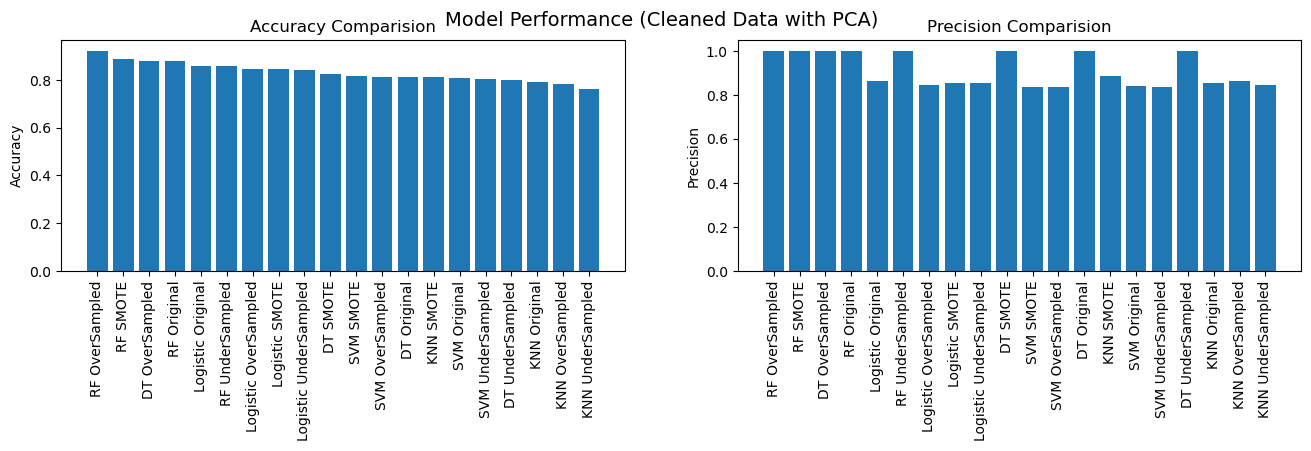

In [48]:
# Sort the model_results list by accuracy
model_results_sorted = sorted(
    model_results, key=lambda x: x[list(x.keys())[0]]["Accuracy"], reverse=True
)

# Get the model names and their corresponding accuracy and precision scores
model_names = []
accuracy_scores = []
precision_scores = []
for model_dict in model_results_sorted:
    model_name = list(model_dict.keys())[0]
    model_names.append(model_name)
    accuracy_scores.append(model_dict[model_name]["Accuracy"])
    precision_scores.append(model_dict[model_name]["Precision"])

# Plot the accuracy and precision bar charts side-by-side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 3))

ax1.bar(model_names, accuracy_scores)
ax1.set_ylabel("Accuracy")
ax1.set_title("Accuracy Comparision")
ax1.set_xticks(range(len(model_names)))
ax1.set_xticklabels(model_names, rotation=90)

ax2.bar(model_names, precision_scores)
ax2.set_ylabel("Precision")
ax2.set_title("Precision Comparision")
ax2.set_xticks(range(len(model_names)))
ax2.set_xticklabels(model_names, rotation=90)

fig.suptitle("Model Performance (Cleaned Data with PCA)", fontsize=14)

plt.show()

In [49]:
# Select the best performing model and its corresponding performance metrics
best_model_name = list(model_results_sorted[0].keys())[0]
best_model_performance = model_results_sorted[0][best_model_name]

# Print the name of the best performing model
print(
    f"The best performing model is {best_model_name} with the following performance metrics:"
)

# Print the performance metrics of the best performing model
for metric_name, metric_value in best_model_performance.items():
    if metric_name != "model":  # exclude the model from the printed performance metrics
        print(f"{metric_name}: {metric_value}")
    else:
        best_model = metric_value

The best performing model is RF OverSampled with the following performance metrics:
Accuracy: 0.9215
Precision: 1.0
Recall: 1.0
F1: [0.90045249 0.91402715 0.89140271 0.94110985 0.9603624 ]


In [50]:
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Create an oversampler (e.g., using SMOTE)
oversampler = RandomOverSampler()  # Your oversampler of choice

rf = best_model

# Create a StratifiedKFold cross-validator with 5 folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize an empty list to store confusion matrices for each fold
confusion_matrices = []

# Perform k-fold cross-validation
for train_index, test_index in cv.split(X, y):
    # Split data into training and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Oversample the training data
    X_train_oversampled, y_train_oversampled = oversampler.fit_resample(
        X_train, y_train
    )

    # Train the Random Forest classifier on the oversampled training data
    # rf.fit(X_train_oversampled, y_train_oversampled)

    # Predict labels on the test data
    y_pred = rf.predict(X_test)

    # Compute the confusion matrix for the current fold and append to the list
    confusion_matrix_fold = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(confusion_matrix_fold)

# Print the confusion matrices for each fold
for i, confusion_matrix_fold in enumerate(confusion_matrices):
    print(f"Confusion matrix for fold {i+1}:")
    print(confusion_matrix_fold)
    print()

Confusion matrix for fold 1:
[[285   0]
 [  0 441]]

Confusion matrix for fold 2:
[[284   0]
 [  0 442]]

Confusion matrix for fold 3:
[[284   0]
 [  0 442]]

Confusion matrix for fold 4:
[[284   0]
 [  0 442]]

Confusion matrix for fold 5:
[[284   0]
 [  0 442]]



#### Feature Importances in Best Performing model


The best performing model is RF OverSampled with accuracy 0.9215
                                   feature  importance
22        Curricular units 2nd sem (grade)        0.28
21  Curricular units 2nd sem (evaluations)        0.09
13                 Tuition fees up to date        0.09
16                       Age at enrollment        0.07
3                                   Course        0.05
15                      Scholarship holder        0.04
20     Curricular units 2nd sem (enrolled)        0.04
9                      Father's occupation        0.03
1                         Application mode        0.03
24                       Unemployment rate        0.03


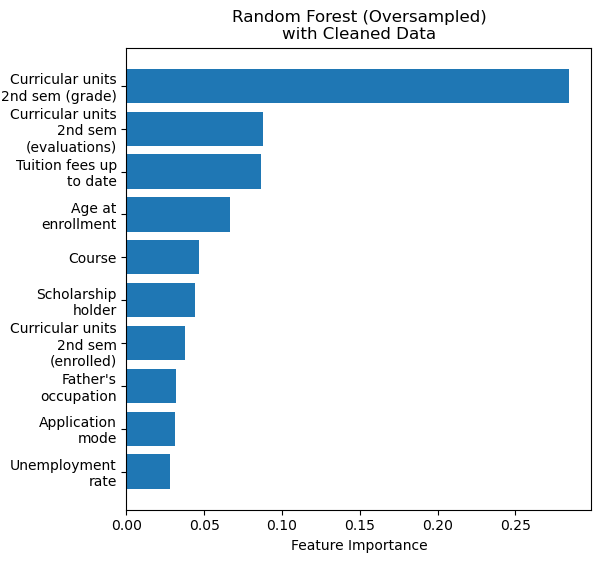

In [51]:
# Select the best performing model and it's corresponding accuracy
best_model = model_results_sorted[0][list(model_results_sorted[0].keys())[0]]["model"]
best_model_accuracy = model_results_sorted[0][list(model_results_sorted[0].keys())[0]][
    "Accuracy"
]

# Print the best performing model's name and accuracy
print(
    f"The best performing model is {list(model_results_sorted[0].keys())[0]} with accuracy {best_model_accuracy}"
)

# get feature importances of RandomOverSampler balanced model
feature_importances = best_model.feature_importances_

# create a dataframe of feature importances
importances_df = pd.DataFrame({"feature": X.columns, "importance": feature_importances})

# sort the dataframe by feature importance in descending order
importances_df = importances_df.sort_values("importance", ascending=False)

# print the top 10 features with their importances
print(importances_df.head(10))

# Set plot size to a square
plt.figure(figsize=(6, 6))

# create a bar chart of feature importances for the top 10 features
top_features = importances_df.head(10)["feature"].values
top_importances = importances_df.head(10)["importance"].values
sorted_idx = top_importances.argsort()
plt.barh(range(len(top_importances)), top_importances[sorted_idx])
plt.yticks(
    range(len(top_importances)), top_features[sorted_idx], wrap=True
)  # Wrap text
plt.title("Random Forest (Oversampled)\nwith Cleaned Data")
plt.xlabel("Feature Importance")
plt.show()

### Building Different Machine Learning Models on Resampled Dataset with PCAs


#### Developing models with different sampling methods


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_fscore_support
from collections import defaultdict

# Getting Data ready for Modelling
X = students_df_pca.drop("Target", axis=1)
y = students_df_pca.Target

# Create a dictionary of resampling methods and their corresponding datasets
resampling_methods = {
    "Original": (X, y),
    "OverSampled": RandomOverSampler().fit_resample(X, y),
    "UnderSampled": RandomUnderSampler().fit_resample(X, y),
    "SMOTE": SMOTE().fit_resample(X, y),
}

# Create an empty list to store the model results for each resampling method
model_results = []

# Iterate through the resampling methods and their corresponding datasets
for resampling_method, (X_resampled, y_resampled) in resampling_methods.items():
    print("Resampling:", resampling_method)

    # Model 1: Logistic Regression
    logreg_model = LogisticRegression(max_iter=1000)
    logreg_model.fit(X_resampled, y_resampled)
    logreg_scores = cross_val_score(
        logreg_model, X_resampled, y_resampled, cv=5, scoring="accuracy"
    )
    logreg_precision, logreg_recall, logreg_f1, logreg_support = (
        precision_recall_fscore_support(
            y_resampled, logreg_model.predict(X_resampled), average="weighted"
        )
    )
    logreg_mean_score = np.mean(logreg_scores)
    model_results.append(
        {
            "Logistic "
            + resampling_method: {
                "Accuracy": round(logreg_mean_score, 2),
                "Precision": round(logreg_precision, 2),
                "Recall": round(logreg_recall, 2),
                "F1": logreg_f1,
                "model": logreg_model,
            }
        }
    )

    # Model 2: K-Nearest Neighbors
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_resampled, y_resampled)
    knn_scores = cross_val_score(
        knn_model, X_resampled, y_resampled, cv=5, scoring="accuracy"
    )
    knn_precision, knn_recall, knn_f1, knn_support = precision_recall_fscore_support(
        y_resampled, knn_model.predict(X_resampled), average="weighted"
    )
    knn_mean_score = np.mean(knn_scores)
    model_results.append(
        {
            "KNN "
            + resampling_method: {
                "Accuracy": round(knn_mean_score, 2),
                "Precision": round(knn_precision, 2),
                "Recall": round(knn_recall, 2),
                "F1": knn_f1,
                "model": knn_model,
            }
        }
    )

    # Model 3: Random Forest
    rf_model = RandomForestClassifier()
    rf_model.fit(X_resampled, y_resampled)
    rf_scores = cross_val_score(
        rf_model, X_resampled, y_resampled, cv=5, scoring="accuracy"
    )
    rf_precision, rf_recall, rf_f1, rf_support = precision_recall_fscore_support(
        y_resampled, rf_model.predict(X_resampled), average="weighted"
    )
    rf_mean_score = np.mean(rf_scores)
    model_results.append(
        {
            "RF "
            + resampling_method: {
                "Accuracy": round(rf_mean_score, 2),
                "Precision": round(rf_precision, 2),
                "Recall": round(rf_recall, 2),
                "F1": rf_scores,
                "model": rf_model,
            }
        }
    )
    # Model 4: Decision Tree
    dt_model = DecisionTreeClassifier()
    dt_model.fit(X_resampled, y_resampled)
    dt_scores = cross_val_score(
        dt_model, X_resampled, y_resampled, cv=5, scoring="accuracy"
    )
    dt_precision, dt_recall, dt_f1, dt_support = precision_recall_fscore_support(
        y_resampled, dt_model.predict(X_resampled), average="weighted"
    )
    dt_mean_score = np.mean(dt_scores)
    model_results.append(
        {
            "DT "
            + resampling_method: {
                "Accuracy": round(dt_mean_score, 2),
                "Precision": round(dt_precision, 2),
                "Recall": round(dt_recall, 2),
                "F1": dt_scores,
                "model": dt_model,
            }
        }
    )
    # Model 5: SVM
    svm_model = SVC()
    svm_model.fit(X_resampled, y_resampled)
    svm_scores = cross_val_score(
        svm_model, X_resampled, y_resampled, cv=5, scoring="accuracy"
    )
    svm_precision, svm_recall, svm_f1, svm_support = precision_recall_fscore_support(
        y_resampled, svm_model.predict(X_resampled), average="weighted"
    )
    svm_mean_score = np.mean(svm_scores)
    model_results.append(
        {
            "SVM "
            + resampling_method: {
                "Accuracy": round(svm_mean_score, 2),
                "Precision": round(svm_precision, 2),
                "Recall": round(svm_recall, 2),
                "F1": svm_scores,
                "model": svm_model,
            }
        }
    )

# Display model performance metrics
for result in model_results:
    for model_name, scores in result.items():
        print(f"\nResults for {model_name}:")
        for metric, value in scores.items():
            print(f"\t{metric}: {value}")

Resampling: Original
Resampling: OverSampled
Resampling: OverSampled
Resampling: UnderSampled
Resampling: UnderSampled
Resampling: SMOTE
Resampling: SMOTE

Results for Logistic Original:
	Accuracy: 0.75
	Precision: 0.76
	Recall: 0.75
	F1: 0.7440283186011829
	model: LogisticRegression(max_iter=1000)

Results for KNN Original:
	Accuracy: 0.61
	Precision: 0.74
	Recall: 0.74
	F1: 0.7310825648224603
	model: KNeighborsClassifier()

Results for RF Original:
	Accuracy: 0.76
	Precision: 1.0
	Recall: 1.0
	F1: [0.74747475 0.77272727 0.77946128 0.73569024 0.76094276]
	model: RandomForestClassifier()

Results for DT Original:
	Accuracy: 0.68
	Precision: 1.0
	Recall: 1.0
	F1: [0.66666667 0.71043771 0.6986532  0.65488215 0.67171717]
	model: DecisionTreeClassifier()

Results for SVM Original:
	Accuracy: 0.66
	Precision: 0.69
	Recall: 0.69
	F1: [0.67340067 0.63636364 0.66498316 0.65993266 0.68518519]
	model: SVC()

Results for Logistic OverSampled:
	Accuracy: 0.72
	Precision: 0.73
	Recall: 0.73
	F1: 0.

#### Performance Comparision among models


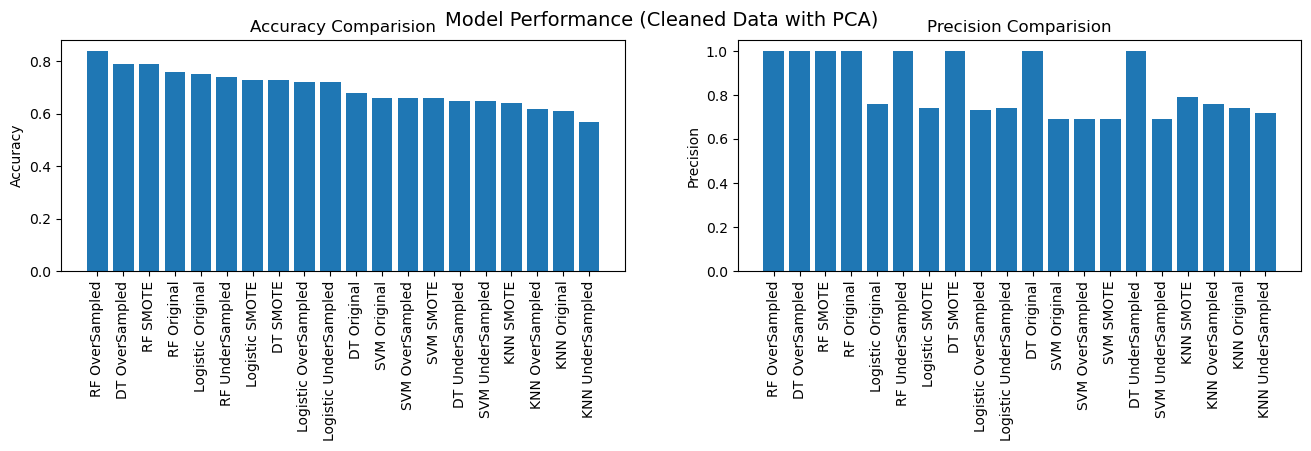

In [53]:
# Sort the model_results list by accuracy
model_results_sorted = sorted(
    model_results, key=lambda x: x[list(x.keys())[0]]["Accuracy"], reverse=True
)

# Get the model names and their corresponding accuracy and precision scores
model_names = []
accuracy_scores = []
precision_scores = []
for model_dict in model_results_sorted:
    model_name = list(model_dict.keys())[0]
    model_names.append(model_name)
    accuracy_scores.append(model_dict[model_name]["Accuracy"])
    precision_scores.append(model_dict[model_name]["Precision"])

# Plot the accuracy and precision bar charts side-by-side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 3))

ax1.bar(model_names, accuracy_scores)
ax1.set_ylabel("Accuracy")
ax1.set_title("Accuracy Comparision")
ax1.set_xticks(range(len(model_names)))
ax1.set_xticklabels(model_names, rotation=90)

ax2.bar(model_names, precision_scores)
ax2.set_ylabel("Precision")
ax2.set_title("Precision Comparision")
ax2.set_xticks(range(len(model_names)))
ax2.set_xticklabels(model_names, rotation=90)

fig.suptitle("Model Performance (Cleaned Data with PCA)", fontsize=14)

plt.show()

In [54]:
# Select the best performing model and its corresponding performance metrics
best_model_name = list(model_results_sorted[0].keys())[0]
best_model_performance = model_results_sorted[0][best_model_name]

# Print the name of the best performing model
print(
    f"The best performing model is {best_model_name} with the following performance metrics:"
)

# Print the performance metrics of the best performing model
for metric_name, metric_value in best_model_performance.items():
    if metric_name != "model":  # exclude the model from the printed performance metrics
        print(f"{metric_name}: {metric_value}")

The best performing model is RF OverSampled with the following performance metrics:
Accuracy: 0.84
Precision: 1.0
Recall: 1.0
F1: [0.82554945 0.81043956 0.7967033  0.85006878 0.91746905]


#### Feature Importances in Best Performing model


The best performing model is RF OverSampled with accuracy 0.84
                    feature  importance
13  Tuition fees up to date        0.11
18                      PC2        0.10
19                      PC3        0.10
17                      PC1        0.10
3                    Course        0.09
15       Scholarship holder        0.07
1          Application mode        0.07
9       Father's occupation        0.06
7    Father's qualification        0.05
8       Mother's occupation        0.05


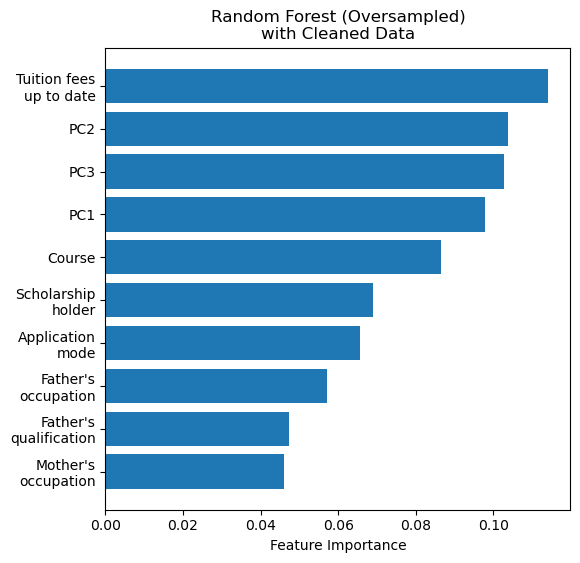

In [55]:
# Select the best performing model and it's corresponding accuracy
best_model = model_results_sorted[0][list(model_results_sorted[0].keys())[0]]["model"]
best_model_accuracy = model_results_sorted[0][list(model_results_sorted[0].keys())[0]][
    "Accuracy"
]

# Print the best performing model's name and accuracy
print(
    f"The best performing model is {list(model_results_sorted[0].keys())[0]} with accuracy {best_model_accuracy}"
)

# get feature importances of RandomOverSampler balanced model
feature_importances = best_model.feature_importances_

# create a dataframe of feature importances
importances_df = pd.DataFrame({"feature": X.columns, "importance": feature_importances})

# sort the dataframe by feature importance in descending order
importances_df = importances_df.sort_values("importance", ascending=False)

# print the top 10 features with their importances
print(importances_df.head(10))

# Set plot size to a square
plt.figure(figsize=(6, 6))

# create a bar chart of feature importances for the top 10 features
top_features = importances_df.head(10)["feature"].values
top_importances = importances_df.head(10)["importance"].values
sorted_idx = top_importances.argsort()
plt.barh(range(len(top_importances)), top_importances[sorted_idx])
plt.yticks(
    range(len(top_importances)), top_features[sorted_idx], wrap=True
)  # Wrap text
plt.title("Random Forest (Oversampled)\nwith Cleaned Data")
plt.xlabel("Feature Importance")
plt.show()

### Building Different Machine Learning Models on Resampled and additionally Normalised and Outliers removed Data


Data Preprocessing


In [56]:
# Convert Target to numerical
students_df_normalised_no_outliers["Target"].replace("Dropout", 0, inplace=True)
students_df_normalised_no_outliers["Target"].replace("Graduate", 1, inplace=True)
students_df_normalised_no_outliers["Target"].replace("Enrolled", 2, inplace=True)

# Removing enrolled from Target
students_df_normalised_no_outliers = students_df_normalised_no_outliers[
    students_df_normalised_no_outliers["Target"] != 2
]

# Define features to remove
features_to_remove = [
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (approved)",
    "Nationality",
]

# remove the specified columns from the dataframe
students_df_normalised_no_outliers = students_df_normalised_no_outliers.drop(
    features_to_remove, axis=1
)

C:\Users\IAMRO-PC\AppData\Local\Temp\ipykernel_8696\1410060074.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\IAMRO-PC\AppData\Local\Temp\ipykernel_8696\1410060074.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\IAMRO-PC\AppData\Local\Temp\ipykernel_8696\1410060074.py:3: FutureWarning:

A value is trying to be set on

#### Developing models with different sampling methods


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_fscore_support
from collections import defaultdict

# Getting Data ready for Modelling
X = students_df_normalised_no_outliers.drop("Target", axis=1)
y = students_df_normalised_no_outliers.Target

# Create a dictionary of resampling methods and their corresponding datasets
resampling_methods = {
    "Original": (X, y),
    "OverSampled": RandomOverSampler().fit_resample(X, y),
    "UnderSampled": RandomUnderSampler().fit_resample(X, y),
    "SMOTE": SMOTE().fit_resample(X, y),
}

# Create an empty list to store the model results for each resampling method
model_results_2 = []

# Iterate through the resampling methods and their corresponding datasets
for resampling_method, (X_resampled, y_resampled) in resampling_methods.items():
    print("Resampling:", resampling_method)

    # Model 1: Logistic Regression
    logreg_model = LogisticRegression(max_iter=1000)
    logreg_model.fit(X_resampled, y_resampled)
    logreg_scores = cross_val_score(
        logreg_model, X_resampled, y_resampled, cv=5, scoring="accuracy"
    )
    logreg_precision, logreg_recall, logreg_f1, logreg_support = (
        precision_recall_fscore_support(
            y_resampled, logreg_model.predict(X_resampled), average="weighted"
        )
    )
    logreg_mean_score = np.mean(logreg_scores)
    model_results_2.append(
        {
            "Logistic "
            + resampling_method: {
                "Accuracy": round(logreg_mean_score, 2),
                "Precision": round(logreg_precision, 2),
                "Recall": round(logreg_recall, 2),
                "F1": logreg_f1,
                "model": logreg_model,
            }
        }
    )

    # Model 2: K-Nearest Neighbors
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_resampled, y_resampled)
    knn_scores = cross_val_score(
        knn_model, X_resampled, y_resampled, cv=5, scoring="accuracy"
    )
    knn_precision, knn_recall, knn_f1, knn_support = precision_recall_fscore_support(
        y_resampled, knn_model.predict(X_resampled), average="weighted"
    )
    knn_mean_score = np.mean(knn_scores)
    model_results_2.append(
        {
            "KNN "
            + resampling_method: {
                "Accuracy": round(knn_mean_score, 2),
                "Precision": round(knn_precision, 2),
                "Recall": round(knn_recall, 2),
                "F1": knn_f1,
                "model": knn_model,
            }
        }
    )

    # Model 3: Random Forest
    rf_model = RandomForestClassifier()
    rf_model.fit(X_resampled, y_resampled)
    rf_scores = cross_val_score(
        rf_model, X_resampled, y_resampled, cv=5, scoring="accuracy"
    )
    rf_precision, rf_recall, rf_f1, rf_support = precision_recall_fscore_support(
        y_resampled, rf_model.predict(X_resampled), average="weighted"
    )
    rf_mean_score = np.mean(rf_scores)
    model_results_2.append(
        {
            "RF "
            + resampling_method: {
                "Accuracy": round(rf_mean_score, 2),
                "Precision": round(rf_precision, 2),
                "Recall": round(rf_recall, 2),
                "F1": rf_scores,
                "model": rf_model,
            }
        }
    )
    # Model 4: Decision Tree
    dt_model = DecisionTreeClassifier()
    dt_model.fit(X_resampled, y_resampled)
    dt_scores = cross_val_score(
        dt_model, X_resampled, y_resampled, cv=5, scoring="accuracy"
    )
    dt_precision, dt_recall, dt_f1, dt_support = precision_recall_fscore_support(
        y_resampled, dt_model.predict(X_resampled), average="weighted"
    )
    dt_mean_score = np.mean(dt_scores)
    model_results_2.append(
        {
            "DT "
            + resampling_method: {
                "Accuracy": round(dt_mean_score, 2),
                "Precision": round(dt_precision, 2),
                "Recall": round(dt_recall, 2),
                "F1": dt_scores,
                "model": dt_model,
            }
        }
    )
    # Model 5: SVM
    svm_model = SVC()
    svm_model.fit(X_resampled, y_resampled)
    svm_scores = cross_val_score(
        svm_model, X_resampled, y_resampled, cv=5, scoring="accuracy"
    )
    svm_precision, svm_recall, svm_f1, svm_support = precision_recall_fscore_support(
        y_resampled, svm_model.predict(X_resampled), average="weighted"
    )
    svm_mean_score = np.mean(svm_scores)
    model_results_2.append(
        {
            "SVM "
            + resampling_method: {
                "Accuracy": round(svm_mean_score, 2),
                "Precision": round(svm_precision, 2),
                "Recall": round(svm_recall, 2),
                "F1": svm_scores,
                "model": svm_model,
            }
        }
    )

# Display model performance metrics
for result in model_results_2:
    for model_name, scores in result.items():
        print(f"\nResults for {model_name}:")
        for metric, value in scores.items():
            print(f"\t{metric}: {value}")

Resampling: Original
Resampling: OverSampled
Resampling: OverSampled
Resampling: UnderSampled
Resampling: UnderSampled
Resampling: SMOTE
Resampling: SMOTE

Results for Logistic Original:
	Accuracy: 0.88
	Precision: 0.87
	Recall: 0.88
	F1: 0.8693728008098508
	model: LogisticRegression(max_iter=1000)

Results for KNN Original:
	Accuracy: 0.8
	Precision: 0.83
	Recall: 0.85
	F1: 0.8140576459901306
	model: KNeighborsClassifier()

Results for RF Original:
	Accuracy: 0.88
	Precision: 1.0
	Recall: 1.0
	F1: [0.87901235 0.87901235 0.87654321 0.88395062 0.88148148]
	model: RandomForestClassifier()

Results for DT Original:
	Accuracy: 0.81
	Precision: 1.0
	Recall: 1.0
	F1: [0.82222222 0.80740741 0.83703704 0.79259259 0.80987654]
	model: DecisionTreeClassifier()

Results for SVM Original:
	Accuracy: 0.81
	Precision: 0.85
	Recall: 0.81
	F1: [0.81234568 0.81234568 0.80987654 0.80987654 0.80987654]
	model: SVC()

Results for Logistic OverSampled:
	Accuracy: 0.79
	Precision: 0.8
	Recall: 0.8
	F1: 0.795

#### Performance Comparision among models


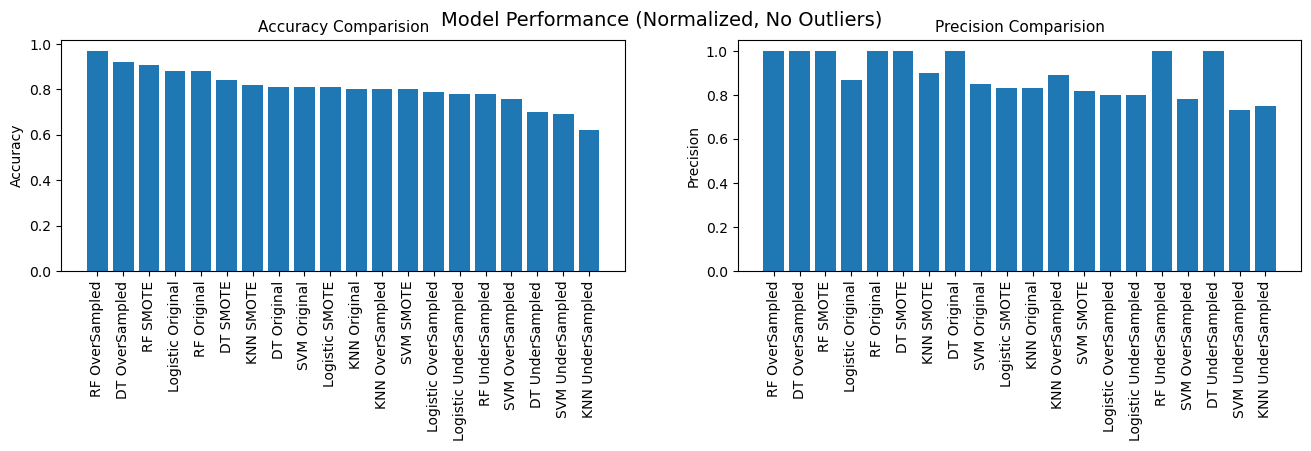

In [58]:
# Sort the model_results list by accuracy
model_results_sorted_2 = sorted(
    model_results_2, key=lambda x: x[list(x.keys())[0]]["Accuracy"], reverse=True
)

# Get the model names and their corresponding accuracy and precision scores
model_names = []
accuracy_scores = []
precision_scores = []
for model_dict in model_results_sorted_2:
    model_name = list(model_dict.keys())[0]
    model_names.append(model_name)
    accuracy_scores.append(model_dict[model_name]["Accuracy"])
    precision_scores.append(model_dict[model_name]["Precision"])

# Plot the accuracy and precision bar charts side-by-side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 3))

ax1.bar(model_names, accuracy_scores)
ax1.set_ylabel("Accuracy")
ax1.set_title("Accuracy Comparision", fontsize=11)
ax1.set_xticks(range(len(model_names)))
ax1.set_xticklabels(model_names, rotation=90)

ax2.bar(model_names, precision_scores)
ax2.set_ylabel("Precision")
ax2.set_title("Precision Comparision", fontsize=11)
ax2.set_xticks(range(len(model_names)))
ax2.set_xticklabels(model_names, rotation=90)

fig.suptitle("Model Performance (Normalized, No Outliers)", fontsize=14)

plt.show()

In [59]:
# Select the best performing model and its corresponding performance metrics
best_model_name = list(model_results_sorted_2[0].keys())[0]
best_model_performance = model_results_sorted_2[0][best_model_name]

# Print the name of the best performing model
print(
    f"The best performing model is {best_model_name} with the following performance metrics:"
)

# Print the performance metrics of the best performing model
for metric_name, metric_value in best_model_performance.items():
    if metric_name != "model":  # exclude the model from the printed performance metrics
        print(f"{metric_name}: {metric_value}")

The best performing model is RF OverSampled with the following performance metrics:
Accuracy: 0.97
Precision: 1.0
Recall: 1.0
F1: [0.95129376 0.96499239 0.97412481 0.97412481 0.9679878 ]


#### Feature Importances in Best Performing model


The best performing model is RF OverSampled with accuracy 0.97
                                   feature  importance
22        Curricular units 2nd sem (grade)        0.17
21  Curricular units 2nd sem (evaluations)        0.12
3                                   Course        0.07
13                 Tuition fees up to date        0.06
16                       Age at enrollment        0.06
20     Curricular units 2nd sem (enrolled)        0.05
9                      Father's occupation        0.05
24                       Unemployment rate        0.04
26                                     GDP        0.04
7                   Father's qualification        0.04


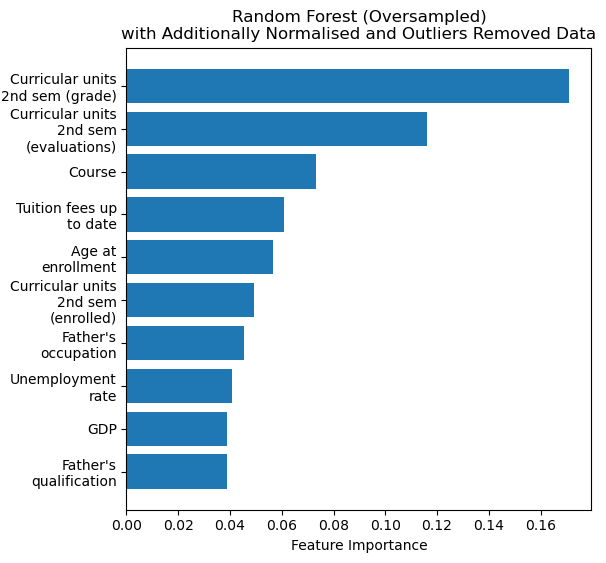

In [60]:
# Select the best performing model and it's corresponding accuracy
best_model = model_results_sorted_2[0][list(model_results_sorted_2[0].keys())[0]][
    "model"
]
best_model_accuracy = model_results_sorted_2[0][
    list(model_results_sorted_2[0].keys())[0]
]["Accuracy"]

# Print the best performing model's name and accuracy
print(
    f"The best performing model is {list(model_results_sorted_2[0].keys())[0]} with accuracy {best_model_accuracy}"
)

# get feature importances of RandomOverSampler balanced model
feature_importances = best_model.feature_importances_

# create a dataframe of feature importances
importances_df = pd.DataFrame({"feature": X.columns, "importance": feature_importances})

# sort the dataframe by feature importance in descending order
importances_df = importances_df.sort_values("importance", ascending=False)

# print the top 10 features with their importances
print(importances_df.head(10))

# Set plot size to a square
plt.figure(figsize=(6, 6))

# Create a bar chart of feature importances for the top 10 features
top_features = importances_df.head(10)["feature"].values
top_importances = importances_df.head(10)["importance"].values
sorted_idx = top_importances.argsort()
plt.barh(range(len(top_importances)), top_importances[sorted_idx])
plt.yticks(
    range(len(top_importances)), top_features[sorted_idx], wrap=True
)  # Wrap text
plt.title(
    "Random Forest (Oversampled)\nwith Additionally Normalised and Outliers Removed Data"
)
plt.xlabel("Feature Importance")

plt.show()

A three-category classification task of the 'Target' variable with a bias towards one class is the issue. To compare it's impact on the overall performance of the model, we created 4 models - 1 with no balancing, 3 with different sampling techniques for class balancing.

The most accurate models are the unbalanced one and the RandomOversampler, although the unbalanced model has poor precision, recall, and F1 scores. The RandomOverSampler balanced model also outperforms the other two balanced models in all 4 of the performance metrics. The balanced RandomUnderSampler model gets the highest recall scores but the lowest accuracy and precision scores. The SMOTE balanced model performs similarly to the RandomUnderSampler balanced model, but with slightly higher recall and F1 scores.

Overall, the RandomOverSampler model outperforms the other models in mojority of the runs.


## Deep Learning


In [61]:
# Import necessary dependencies
import pandas as pd
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import BinaryCrossentropy
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Dropout
from keras.callbacks import TensorBoard
from imblearn.over_sampling import RandomOverSampler


def plot_acc_loss(history, model_name):
    # Plot the accuracy and loss graphs
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.plot(history.history["accuracy"])
    ax1.plot(history.history["val_accuracy"])
    ax1.set_title("Model Accuracy")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Accuracy")
    ax1.legend(["train", "test"], loc="upper left")

    ax2.plot(history.history["loss"])
    ax2.plot(history.history["val_loss"])
    ax2.set_title("Model Loss")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Loss")
    ax2.legend(["train", "test"], loc="upper left")

    fig.suptitle(f"Accuracy and Loss Plots for {model_name}", fontsize=16)
    plt.show()


# Load data available at the time of enrollment
data = students_df_cleaned.drop(
    [
        "Curricular units 1st sem (without evaluations)",
        "Curricular units 2nd sem (credited)",
        "Curricular units 2nd sem (enrolled)",
        "Curricular units 2nd sem (evaluations)",
        "Curricular units 2nd sem (grade)",
        "Curricular units 2nd sem (without evaluations)",
        "Target",
    ],
    axis=1,
)


# Load X & y
X = data.drop("Scholarship holder", axis=1).values
y = data["Scholarship holder"].values

# Instantiate RandomOverSampler
sampler = SMOTE()

# Resample X and y using RandomOverSampler
X, y = sampler.fit_resample(X, y)

# Splits the data into training and test sets, stratifying for class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Transforming the labels into one-hot
enc = OneHotEncoder()
y_train_encoded = enc.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test_encoded = enc.transform(y_test.reshape(-1, 1)).toarray()  #

c:\Users\IAMRO-PC\AppData\Local\anaconda3\envs\myenv\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning:

Unable to find acceptable character detection dependency (chardet or charset_normalizer).



In [62]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Mother's qualification', 'Father's qualification', 'Mother's occupation', 'Father's occupation', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Unemployment rate', 'Inflation rate', 'GDP'], dtype='object')

In [63]:
# Get unique values and their counts
np.unique(y_test, return_counts=True)

(array([0, 1]), array([554, 511]))

In [64]:
# Initialize lists to store performance statistics
i = 1
model_names = []
confusion_matrices = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
classification_reports = []

#### Model 1: Shallow ANN model with sigmoid activations


c:\Users\IAMRO-PC\AppData\Local\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 353 (1.38 KB)

 Trainable params: 353 (1.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5833 - loss: 0.7092 - val_accuracy: 0.6244 - val_loss: 0.6468
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5833 - loss: 0.7092 - val_accuracy: 0.6244 - val_loss: 0.6468
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6361 - loss: 0.6326 - val_accuracy: 0.6488 - val_loss: 0.6335
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6361 - loss: 0.6326 - val_accuracy: 0.6488 - val_loss: 0.6335
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6730 - loss: 0.6159 - val_accuracy: 0.6695 - val_loss: 0.6237
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6730 - loss: 0.6159 - val_accuracy: 0.6695 - val_loss: 0.6237
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6925 - loss: 0.6027 - val_accuracy: 0.6770 - val_loss: 0.6101
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6925 - loss: 0.6027 - val_accuracy: 0.6770 - v

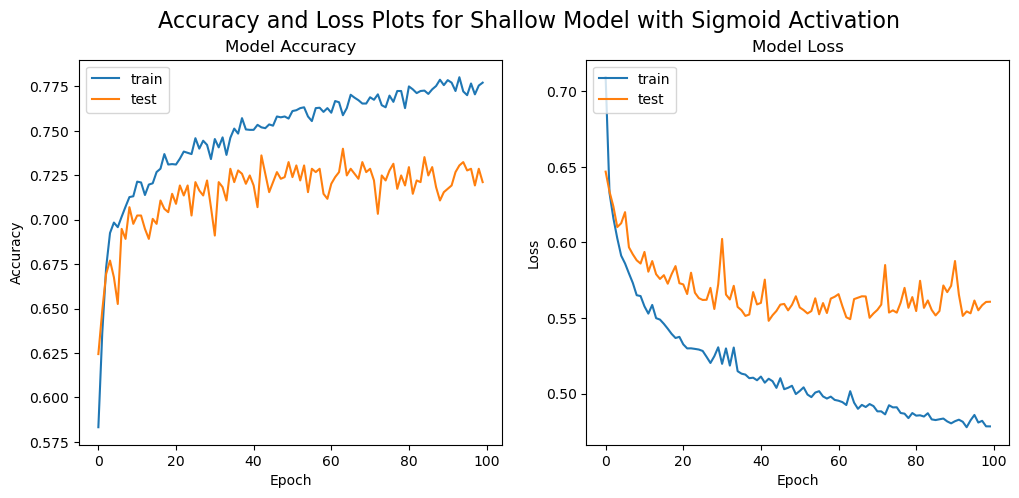

In [65]:
# Building a sequential model
model_sig = Sequential()
model_sig.add(Dense(16, activation="sigmoid", input_shape=(X.shape[1],)))
model_sig.add(Dense(1, activation="sigmoid"))
model_sig.summary()

# Define optimizer and loss function
optimizer = Adam(learning_rate=0.01)
loss_fn = BinaryCrossentropy()

# Compile the model
model_sig.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])

# Fit the model
history_sig = model_sig.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=100,
    verbose=1,
    validation_data=(X_test, y_test),
)

# Plot accuracu and loss
plot_acc_loss(history_sig, "Shallow Model with Sigmoid Activation")

In [67]:
from sklearn.metrics import classification_report

# Generate predictions
y_pred = model_sig.predict(X_test)
y_pred_classes = np.round(y_pred)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Calculate performance metrics
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

# Target Names
target_names = ["Class 0", "Class 1"]
cr = classification_report(y_test, y_pred_classes, target_names=target_names)

# Append performance statistics to lists
model_names.append("Model " + str(i))
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1_scores.append(f1_score)
classification_reports.append(cr)
i += 1

print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1_score * 100))

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Confusion Matrix:
[[343 211]
 [ 86 425]]
Accuracy: 72.11%
Precision: 66.82%
Recall: 83.17%
F1 Score: 74.11%
Confusion Matrix:
[[343 211]
 [ 86 425]]
Accuracy: 72.11%
Precision: 66.82%
Recall: 83.17%
F1 Score: 74.11%


#### Model 2: Shallow ANN model with relu and softmax activations


c:\Users\IAMRO-PC\AppData\Local\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16)             │           336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 414 (1.62 KB)

 Trainable params: 414 (1.62 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3857 - loss: 0.9143 - val_accuracy: 0.3915 - val_loss: 0.7693
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3857 - loss: 0.9143 - val_accuracy: 0.3915 - val_loss: 0.7693
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4101 - loss: 0.7340 - val_accuracy: 0.5127 - val_loss: 0.7038
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4101 - loss: 0.7340 - val_accuracy: 0.5127 - val_loss: 0.7038
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5072 - loss: 0.7016 - val_accuracy: 0.5268 - val_loss: 0.6914
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5072 - loss: 0.7016 - val_accuracy: 0.5268 - val_loss: 0.6914
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5290 - loss: 0.6938 - val_accuracy: 0.5230 - val_loss: 0.6869
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5290 - loss: 0.6938 - val_accuracy: 0.5230 - v

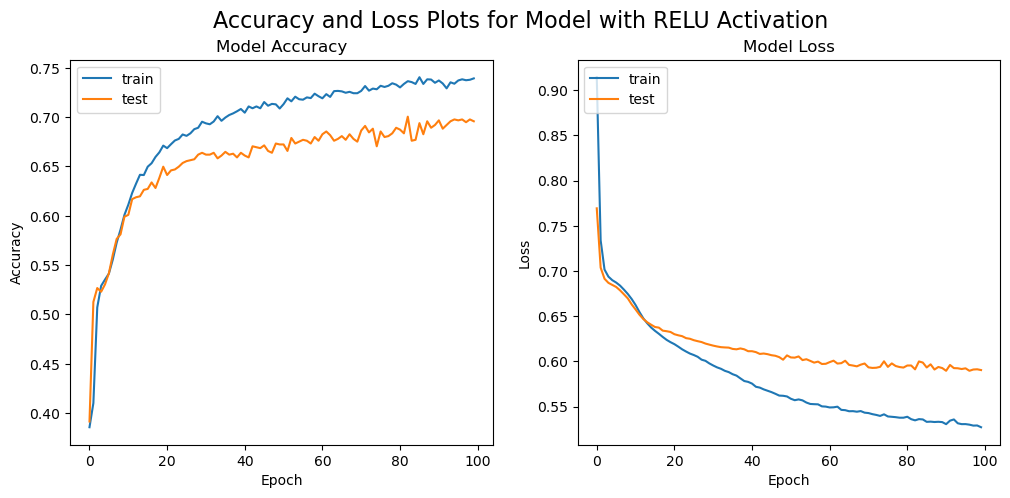

In [68]:
# Building a sequential model
model_relu = Sequential()
model_relu.add(Dense(16, activation="relu", input_shape=(X.shape[1],)))
model_relu.add(Dense(4, activation="relu"))
model_relu.add(Dense(2, activation="softmax"))
model_relu.summary()

# Define optimizer and loss function
optimizer = Adam(learning_rate=0.001)
loss_fn = BinaryCrossentropy()

# Compile the model
model_relu.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])

# Fit the model
history_relu = model_relu.fit(
    X_train,
    y_train_encoded,
    batch_size=128,
    epochs=100,
    verbose=1,
    validation_data=(X_test, y_test_encoded),
)

# Plot accuracy and loss
plot_acc_loss(history_relu, "Model with RELU Activation")

In [69]:
# Generate predictions
y_pred = model_relu.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded y_test to integer labels
y_test_classes = np.argmax(y_test_encoded, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Calculate performance metrics
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

# Target Names
target_names = ["Class 0", "Class 1"]
cr = classification_report(y_test, y_pred_classes, target_names=target_names)

# Append performance statistics to lists
model_names.append("Model " + str(i))
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1_scores.append(f1_score)
classification_reports.append(cr)
i += 1


print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1_score * 100))

# Generate classification report
target_names = ["Class 0", "Class 1"]
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=target_names))

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Confusion Matrix:
[[326 228]
 [ 96 415]]
Accuracy: 69.58%
Precision: 64.54%
Recall: 81.21%
F1 Score: 71.92%
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.77      0.59      0.67       554
     Class 1       0.65      0.81      0.72       511

    accuracy                           0.70      1065
   macro avg       0.71      0.70      0.69      1065
weighted avg       0.71      0.70      0.69      1065

Confusion Matrix:
[[326 228]
 [ 96 415]]
Accuracy: 69.58%
Precision: 64.54%
Recall: 81.21%
F1 Score: 71.92%
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.77      0.59      0.67       554
     Class 1       0.65      0.81      0.72       511

    accuracy                           0.70      1065
   macro avg       0.71      0.70      0.69      1065
weighted avg       0.71      0.70      0.69      1065



#### Model 3: Deep ANN Model with relu and sigmoid


c:\Users\IAMRO-PC\AppData\Local\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 256)            │         5,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,200 (184.38 KB)

 Trainable params: 47,200 (184.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5584 - loss: 0.8131 - val_accuracy: 0.6038 - val_loss: 0.6798
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5584 - loss: 0.8131 - val_accuracy: 0.6038 - val_loss: 0.6798
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6079 - loss: 0.6735 - val_accuracy: 0.6169 - val_loss: 0.6466
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6079 - loss: 0.6735 - val_accuracy: 0.6169 - val_loss: 0.6466
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6411 - loss: 0.6474 - val_accuracy: 0.6235 - val_loss: 0.6356
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6411 - loss: 0.6474 - val_accuracy: 0.6235 - val_loss: 0.6356
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6549 - loss: 0.6324 - val_accuracy: 0.6291 - val_loss: 0.6277
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6549 - loss: 0.6324 - val_accuracy: 0.6291 -

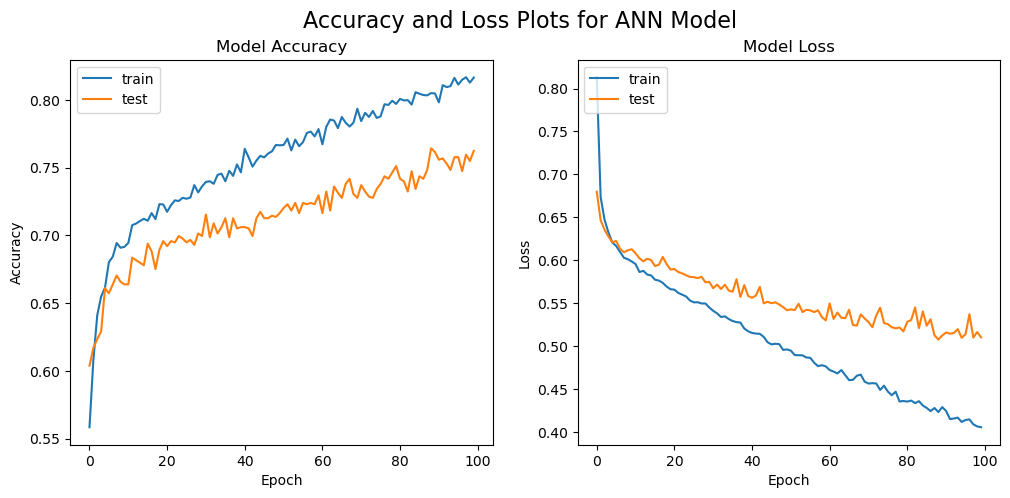

In [70]:
# Building a sequential model
model_ann = Sequential()
model_ann.add(Dense(256, activation="relu", input_shape=(X.shape[1],)))
model_ann.add(Dense(128, activation="relu"))
model_ann.add(Dense(64, activation="relu"))
model_ann.add(Dropout(0.2))
model_ann.add(Dense(10, activation="relu"))
model_ann.add(Dense(2, activation="softmax"))
model_ann.summary()

# Define optimizer and loss function
optimizer = Adam(learning_rate=0.0001)
loss_fn = BinaryCrossentropy()

# Compile the model
model_ann.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])

# Fit the model
history_ann = model_ann.fit(
    X_train,
    y_train_encoded,
    batch_size=128,
    epochs=100,
    verbose=1,
    validation_data=(X_test, y_test_encoded),
)

# Plot accuracu and loss
plot_acc_loss(history_ann, "ANN Model")

In [71]:
# Generate predictions
y_pred = model_ann.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded y_test to integer labels
y_test_classes = np.argmax(y_test_encoded, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Calculate performance metrics
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

# Target Names
target_names = ["Class 0", "Class 1"]
cr = classification_report(y_test, y_pred_classes, target_names=target_names)

# Append performance statistics to lists
model_names.append("Model " + str(i))
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1_scores.append(f1_score)
classification_reports.append(cr)
i += 1

print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1_score * 100))

# Generate classification report
target_names = ["Class 0", "Class 1"]
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=target_names))

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Confusion Matrix:
[[379 175]
 [ 78 433]]
Accuracy: 76.24%
Precision: 71.22%
Recall: 84.74%
F1 Score: 77.39%
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.83      0.68      0.75       554
     Class 1       0.71      0.85      0.77       511

    accuracy                           0.76      1065
   macro avg       0.77      0.77      0.76      1065
weighted avg       0.77      0.76      0.76      1065

Confusion Matrix:
[[379 175]
 [ 78 433]]
Accuracy: 76.24%
Precision: 71.22%
Recall: 84.74%
F1 Score: 77.39%
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.83      0.68      0.75       554
     Class 1       0.71      0.85      0.77       511

    accuracy                           0.76      1065
   macro avg       0.77      0.77      0.76      1065
weighted avg       0.77      0.76      0.76      1065



#### Model 4: Deep model using CNNs for Classification


Epoch 1/100


c:\Users\IAMRO-PC\AppData\Local\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



34/34 - 2s - 60ms/step - accuracy: 0.6103 - loss: 0.6615 - val_accuracy: 0.6329 - val_loss: 0.6431
Epoch 2/100
Epoch 2/100
34/34 - 0s - 9ms/step - accuracy: 0.6660 - loss: 0.6262 - val_accuracy: 0.6563 - val_loss: 0.6312
Epoch 3/100
34/34 - 0s - 9ms/step - accuracy: 0.6660 - loss: 0.6262 - val_accuracy: 0.6563 - val_loss: 0.6312
Epoch 3/100
34/34 - 0s - 9ms/step - accuracy: 0.6749 - loss: 0.6143 - val_accuracy: 0.6629 - val_loss: 0.6211
Epoch 4/100
34/34 - 0s - 9ms/step - accuracy: 0.6749 - loss: 0.6143 - val_accuracy: 0.6629 - val_loss: 0.6211
Epoch 4/100
34/34 - 0s - 9ms/step - accuracy: 0.6831 - loss: 0.6084 - val_accuracy: 0.6714 - val_loss: 0.6125
Epoch 5/100
34/34 - 0s - 9ms/step - accuracy: 0.6831 - loss: 0.6084 - val_accuracy: 0.6714 - val_loss: 0.6125
Epoch 5/100
34/34 - 0s - 9ms/step - accuracy: 0.6906 - loss: 0.5999 - val_accuracy: 0.6507 - val_loss: 0.6197
Epoch 6/100
34/34 - 0s - 9ms/step - accuracy: 0.6906 - loss: 0.5999 - val_accuracy: 0.6507 - val_loss: 0.6197
Epoch 6/1

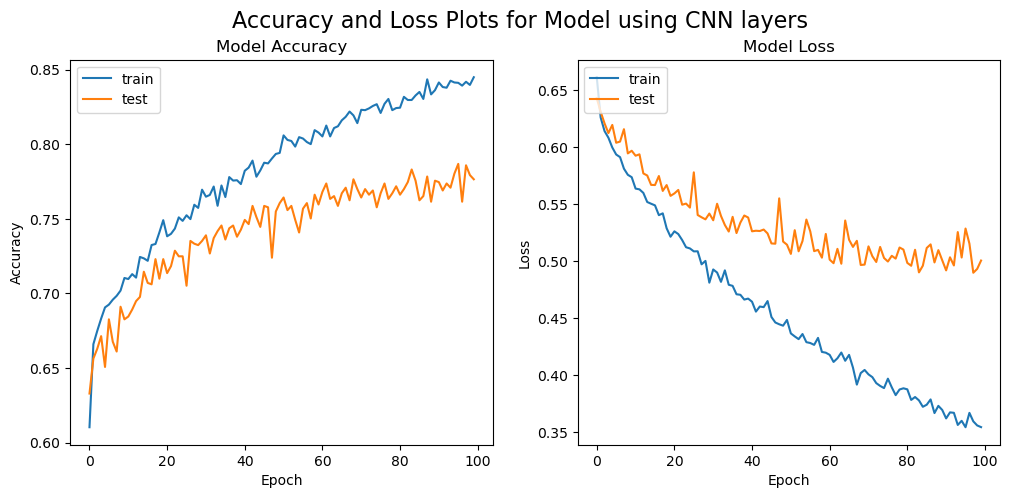

In [72]:
from keras.layers import Conv2D, MaxPool2D, Flatten

# Transform inputs to have shape (batch_size, 27, 1, 1)
X_train_CNN = np.expand_dims(np.expand_dims(X_train, axis=2), axis=3)
X_test_CNN = np.expand_dims(np.expand_dims(X_test, axis=2), axis=3)

# Build the model
model_CNN = Sequential()
model_CNN.add(
    Conv2D(
        filters=64,
        kernel_size=(5, 1),
        strides=(1, 1),
        padding="same",
        activation="relu",
        input_shape=(X_train_CNN[0].shape[0], 1, 1),
    )
)
model_CNN.add(
    Conv2D(
        filters=16,
        kernel_size=(5, 1),
        strides=(1, 1),
        padding="same",
        activation="relu",
    )
)
model_CNN.add(MaxPool2D(pool_size=(2, 1), strides=(2, 1)))
model_CNN.add(Flatten())
model_CNN.add(Dense(120, activation="relu"))
model_CNN.add(Dropout(0.2))
model_CNN.add(Dense(64, activation="relu"))
model_CNN.add(Dense(2, activation="softmax"))

# Compile and train the model
model_CNN.compile(
    optimizer=Adam(learning_rate=3e-4), loss=BinaryCrossentropy(), metrics=["accuracy"]
)
history_CNN = model_CNN.fit(
    X_train_CNN,
    y_train_encoded,
    epochs=100,
    batch_size=128,
    verbose=2,
    validation_data=(X_test_CNN, y_test_encoded),
)

# Plot accuracy and loss graphs
plot_acc_loss(history_CNN, model_name="Model using CNN layers")

In [73]:
model_CNN.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 20, 1, 64)      │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 20, 1, 16)      │         5,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 10, 1, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 120)            │        19,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         7,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,144 (383.38 KB)

 Trainable params: 32,714 (127.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 65,430 (255.59 KB)

In [74]:
# Generate predictions
y_pred = model_CNN.predict(X_test_CNN)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded y_test to integer labels
y_test_classes = np.argmax(y_test_encoded, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Calculate performance metrics
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

# Target Names
target_names = ["Class 0", "Class 1"]
cr = classification_report(y_test, y_pred_classes, target_names=target_names)

# Append performance statistics to lists
model_names.append("Model " + str(i))
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1_scores.append(f1_score)
classification_reports.append(cr)
i += 1

print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1_score * 100))

# Generate classification report
target_names = ["Class 0", "Class 1"]
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=target_names))

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Confusion Matrix:
[[415 139]
 [ 99 412]]
Accuracy: 77.65%
Precision: 74.77%
Recall: 80.63%
F1 Score: 77.59%
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.81      0.75      0.78       554
     Class 1       0.75      0.81      0.78       511

    accuracy                           0.78      1065
   macro avg       0.78      0.78      0.78      1065
weighted avg       0.78      0.78      0.78      1065

Confusion Matrix:
[[415 139]
 [ 99 412]]
Accuracy: 77.65%
Precision: 74.77%
Recall: 80.63%
F1 Score: 77.59%
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.81      0.75      0.78       554
     Class 1       0.75      0.81      0.78       511

    accuracy                           0.78      1065
   macro avg       0.78      0.78      0.78      1065
weighted avg       0.78      0.78      0.78      1065



#### Performance Comparison


In [76]:
# Create dataframe from lists
performance_df = pd.DataFrame(
    {
        "Model Name": model_names,
        "Accuracy": accuracies,
        "Precision": precisions,
        "Recall": recalls,
        "F1 Score": f1_scores,
    }
)

# Display dataframe
print(performance_df)

  Model Name  Accuracy  Precision  Recall  F1 Score
0    Model 1      0.72       0.67    0.83      0.74
1    Model 2      0.70       0.65    0.81      0.72
2    Model 3      0.76       0.71    0.85      0.77
3    Model 4      0.78       0.75    0.81      0.78


## Save the Best Models for Production


In [ ]:
import pickle
import os

# Create directory for trained models if it doesn't exist
models_dir = "../trained-models"
os.makedirs(models_dir, exist_ok=True)

# Based on the results, RF OverSampled was the best
# Let's retrain it and save it along with the scaler and other preprocessing objects

# Train the final best model (RF with OverSampling on normalized data without outliers)
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

# Prepare the data
X_final = students_df_normalised_no_outliers.drop(["Target"], axis=1)
y_final = students_df_normalised_no_outliers["Target"]

# Encode target
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_final_encoded = label_encoder.fit_transform(y_final)

# Apply oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_final, y_final_encoded)

# Train the final model
final_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
final_model.fit(X_resampled, y_resampled)

# Save the trained model
model_path = os.path.join(models_dir, "rf_dropout_prediction_model.pkl")
with open(model_path, "wb") as f:
    pickle.dump(final_model, f)

# Save the label encoder
encoder_path = os.path.join(models_dir, "label_encoder.pkl")
with open(encoder_path, "wb") as f:
    pickle.dump(label_encoder, f)

# Save feature names for reference
feature_names_path = os.path.join(models_dir, "feature_names.pkl")
with open(feature_names_path, "wb") as f:
    pickle.dump(list(X_final.columns), f)

print(f"✓ Model saved to {model_path}")
print(f"✓ Label encoder saved to {encoder_path}")
print(f"✓ Feature names saved to {feature_names_path}")
print(
    f"\nModel Accuracy on full training set: {final_model.score(X_resampled, y_resampled):.4f}"
)
print(f"Number of features: {len(X_final.columns)}")
print(f"Classes: {label_encoder.classes_}")

✓ Model saved to ../trained-models\rf_dropout_prediction_model.pkl
✓ Label encoder saved to ../trained-models\label_encoder.pkl
✓ Feature names saved to ../trained-models\feature_names.pkl

Model Accuracy on full training set: 1.0000
Number of features: 27
Classes: [0 1]
